In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df=pd.read_csv("/content/drive/MyDrive/Kaggle Competition/train.csv")

In [ ]:
train_df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [ ]:
train_df.shape

(140700, 20)

In [ ]:
print(train_df.head())
print(train_df.info())

   id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure  CGPA  \
0              Chef                NaN            5.0   NaN   
1           Teacher                NaN            4.0   NaN   
2               NaN                5.0            NaN  8.97   
3           Teacher                NaN            5.0   NaN   
4  Business Analyst                NaN            1.0   NaN   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0                 NaN               2.0  More than 8 hours     

In [ ]:
train_df.isnull().sum()/len(train_df)*100

,0
id,0.000000
Name,0.000000
Gender,0.000000
Age,0.000000
City,0.000000
Working Professional or Student,0.000000
Profession,26.034115
Academic Pressure,80.172708
Work Pressure,19.842217
CGPA,80.171997


In [ ]:
train_df.select_dtypes(exclude=np.number).nunique()

,0
Name,422
Gender,2
City,98
Working Professional or Student,2
Profession,64
Sleep Duration,36
Dietary Habits,23
Degree,115
Have you ever had suicidal thoughts ?,2
Family History of Mental Illness,2


In [ ]:
train_df.duplicated().sum()

0

In [ ]:
train_df.describe(include=np.number)

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [ ]:
train_df.describe(exclude=np.number)

,Name,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,140700,140700,140700,140700,104070,140700,140696,140698,140700,140700
unique,422,2,98,2,64,36,23,115,2,2
top,Rohan,Male,Kalyan,Working Professional,Teacher,Less than 5 hours,Moderate,Class 12,No,No
freq,3178,77464,6591,112799,24906,38784,49705,14729,71138,70758


In [ ]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(train_df,test_size=0.2,random_state=87)

In [ ]:
df_train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
127399,127399,Gauri,Female,28.0,Varanasi,Student,NaN,4.0,NaN,6.53,2.0,NaN,7-8 hours,Healthy,BCA,No,0.0,3.0,No,0
23578,23578,Shiv,Male,47.0,Agra,Working Professional,Research Analyst,NaN,3.0,NaN,NaN,4.0,5-6 hours,Moderate,M.Pharm,Yes,7.0,5.0,No,0
127553,127553,Manvi,Female,25.0,Visakhapatnam,Student,NaN,1.0,NaN,7.09,5.0,NaN,5-6 hours,Unhealthy,MBA,Yes,12.0,4.0,Yes,1
85588,85588,Pranav,Male,59.0,Varanasi,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Unhealthy,BE,No,0.0,4.0,No,0
44808,44808,Aaradhya,Female,45.0,Indore,Working Professional,Pharmacist,NaN,3.0,NaN,NaN,4.0,7-8 hours,Healthy,B.Pharm,No,8.0,1.0,Yes,0


In [ ]:
df=df_train.copy()
df.drop("id",axis=1,inplace=True)

In [ ]:
convert_to_cat=["Academic Pressure","Work Pressure","Study Satisfaction","Job Satisfaction","Financial Stress","Depression"]
df[convert_to_cat]=df[convert_to_cat].astype("object")

In [ ]:
df.describe()

,Age,CGPA,Work/Study Hours
count,112560.000000,22268.000000,112560.000000
mean,40.402345,7.662263,6.254256
std,12.382609,1.463817,3.854708
min,18.000000,5.030000,0.000000
25%,29.000000,6.290000,3.000000
50%,42.000000,7.770000,6.000000
75%,51.000000,8.920000,10.000000
max,60.000000,10.000000,12.000000


In [ ]:
df.describe(exclude=np.number)

,Name,Gender,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Financial Stress,Family History of Mental Illness,Depression
count,112560,112560,112560,112560,83332,22268.0,90277.0,22266.0,90285.0,112560,112556,112558,112560,112558.0,112560,112560
unique,393,2,89,2,63,5.0,5.0,5.0,5.0,32,19,101,2,5.0,2,2
top,Rohan,Male,Kalyan,Working Professional,Teacher,3.0,2.0,4.0,2.0,Less than 5 hours,Moderate,Class 12,No,2.0,No,0
freq,2501,62036,5236,90289,20010,5945.0,19393.0,5087.0,19860.0,30904,39750,11720,56887,25091.0,56629,92083


In [ ]:
df.isnull().sum()/len(df)*100

,0
Name,0.000000
Gender,0.000000
Age,0.000000
City,0.000000
Working Professional or Student,0.000000
Profession,25.966596
Academic Pressure,80.216773
Work Pressure,19.796553
CGPA,80.216773
Study Satisfaction,80.218550


In [ ]:
df.select_dtypes(exclude=np.number).nunique()

,0
Name,393
Gender,2
City,89
Working Professional or Student,2
Profession,63
Academic Pressure,5
Work Pressure,5
Study Satisfaction,5
Job Satisfaction,5
Sleep Duration,32


In [ ]:
cat_cols=df.select_dtypes(exclude=np.number).columns
unique={col:df[col].unique() for col in cat_cols}
unique

{'Name': array(['Gauri', 'Shiv', 'Manvi', 'Pranav', 'Aaradhya', 'Raunak', 'Ayush',
        'Ayaan', 'Arav', 'Prachi', 'Anaya', 'Veda', 'Raghavendra',
        'Armaan', 'Siddharth', 'Rashi', 'Tushar', 'Ritvik', 'Aarohi',
        'Isha', 'Aakash', 'Lakshay', 'Nalini', 'Anvi', 'Aishwarya',
        'Kunal', 'Shivansh', 'Rhea', 'Rupak', 'Zara', 'Aarsh', 'Samaira',
        'Nandini', 'Riya', 'Vedant', 'Tanisha', 'Reyansh', 'Bhavna',
        'Vibha', 'Tina', 'Pooja', 'Shaurya', 'Lata', 'Aarya', 'Ishan',
        'Aadhya', 'Vihaan', 'Vikram', 'Chirag', 'Aarav', 'Rupa', 'Naina',
        'Ila', 'Dhruv', 'Trisha', 'Garima', 'Deepak', 'Kriti', 'Prisha',
        'Nisha', 'Sanya', 'Ishaani', 'Palak', 'Abhinav', 'Damini', 'Aditi',
        'Aniket', 'Tanmay', 'Harsha', 'Saanvi', 'Vidya', 'Khushi',
        'Chhavi', 'Vani', 'Gagan', 'Shruti', 'Jhanvi', 'Jiya', 'Raghav',
        'Vivaan', 'Harsh', 'Anand', 'Ira', 'Rupal', 'Ayansh', 'Ansh',
        'Eshita', 'Vivan', 'Kashish', 'Mahika', 'Ivaan', 'Himani'




* ID, Name ,city  has city has high cordinality so we can consider it to  remove it
* dregree, Dietary Habits ,Sleep Duration need preprocessing
* profession need proprocessing

Preprocessing and cleaning data

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all columns


In [ ]:
# to remove biase ness of our model we should not include name in the model so
df.drop(columns=["Name"],inplace=True)

In [ ]:
invalid_professions = [
    "Unveil", "BE", "Visakhapatnam", "Moderate", "BCA", "LLM", "PhD", "B.Com",
    "Profession", "B.Ed", "Yuvraj", "Yogesh", "Nagpur", "Pranav", "Patna", "BBA", "M.Ed"]
invalid_sleep_duration = [
    'Indore',
    'Unhealthy',
    'Pune',
    'Sleep_Duration'
]
invalid_dietry_habits=['BSc', '3', '2', 'Indoor', 'M.Tech', 'Pratham', 'Class 12', 'Male', 'Yes', '1.0', 'Mihir', 'Electrician']
invalid_degrees = [
    'UX/UI Designer', 'Degree', 'Data Scientist', 'LL.Com', 'S.Arch',
    '5.56', 'Brithika','29', 'Kalyan', 'Bhopal', 'Plumber', 'Pihu',
    'Brit', 'M', 'Mihir', 'Vivaan', 'CGPA', 'B', '8.56', 'BB',
    'Lata', '5.88', 'B.03',
    'Jhanvi', '20', 'Nalini', 'Ritik', '7.06', 'Aarav', 'Esha', 'Entrepreneur','Badhya',
    'Unite', 'Navya', '24']

In [ ]:
df["Degree"]=df["Degree"].apply(lambda x: np.nan if x in invalid_degrees else x)
df["Sleep Duration"]=df["Sleep Duration"].apply(lambda x: np.nan if x in invalid_sleep_duration else x)
df["Dietary Habits"]=df["Dietary Habits"].apply(lambda x: np.nan if x in invalid_dietry_habits else x)
df["Profession"]=df["Profession"].apply(lambda x: np.nan if x in invalid_professions else x)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112560 entries, 127399 to 60902
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 112560 non-null  object 
 1   Age                                    112560 non-null  float64
 2   City                                   112560 non-null  object 
 3   Working Professional or Student        112560 non-null  object 
 4   Profession                             83309 non-null   object 
 5   Academic Pressure                      22268 non-null   object 
 6   Work Pressure                          90277 non-null   object 
 7   CGPA                                   22268 non-null   float64
 8   Study Satisfaction                     22266 non-null   object 
 9   Job Satisfaction                       90285 non-null   object 
 10  Sleep Duration                         112554 non-null  o

In [ ]:
df.drop(columns=["City"],inplace=True)

<Axes: xlabel='Depression'>

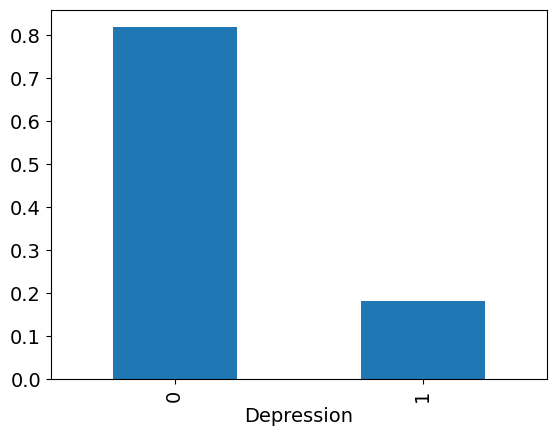

In [ ]:
df["Depression"].value_counts(normalize=True).plot(kind="bar")

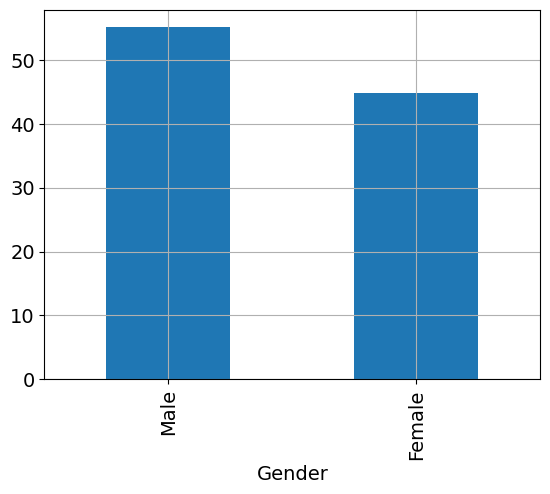

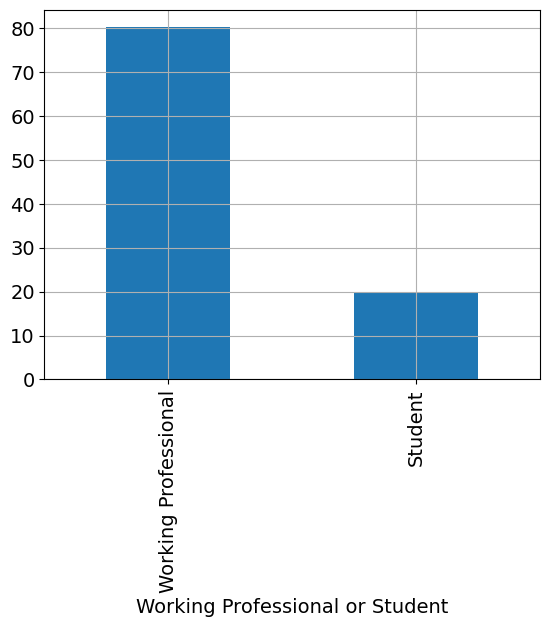

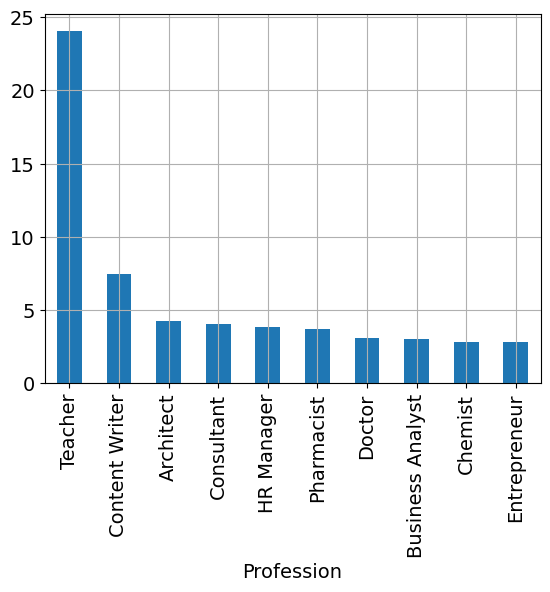

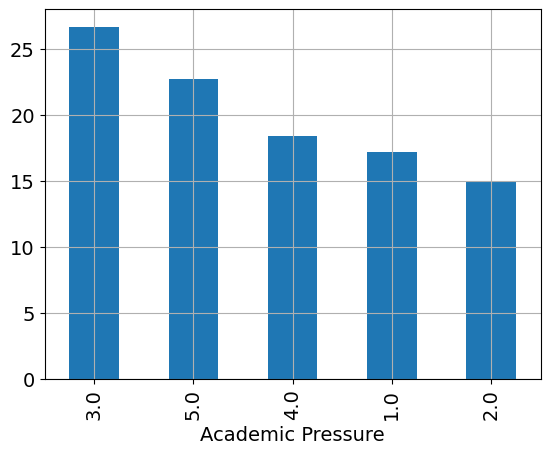

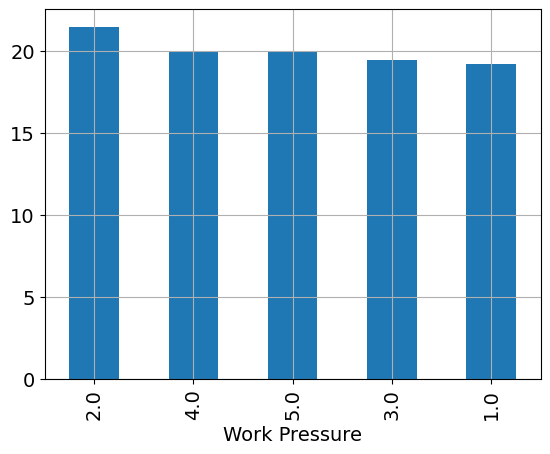

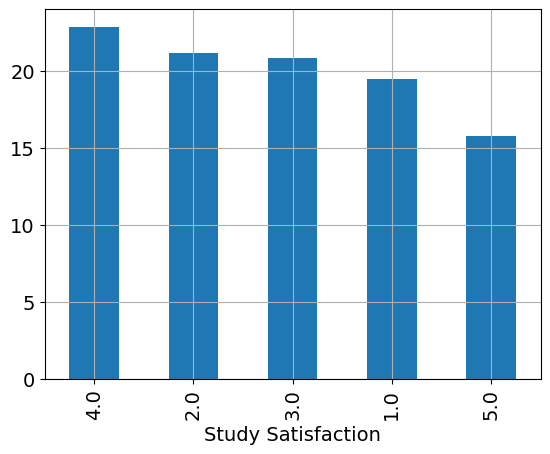

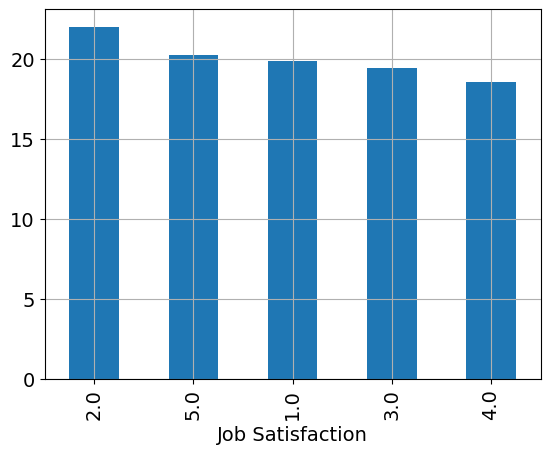

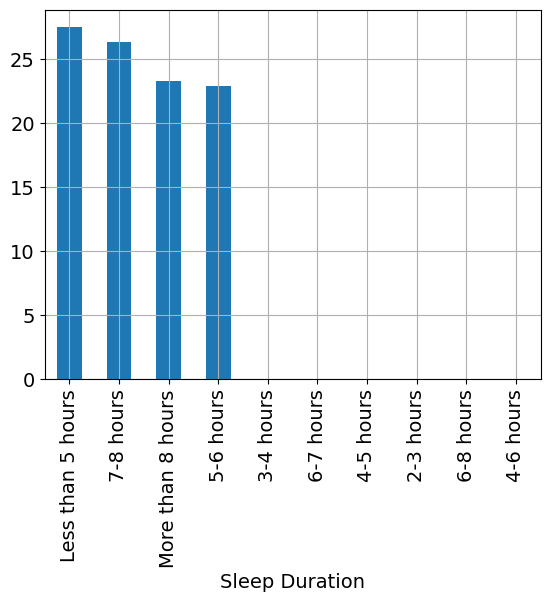

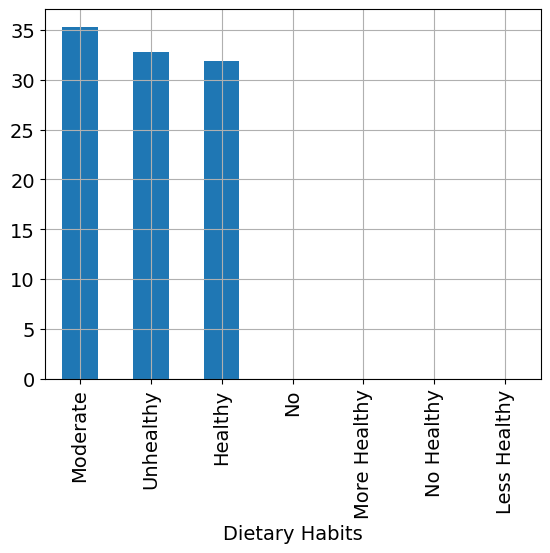

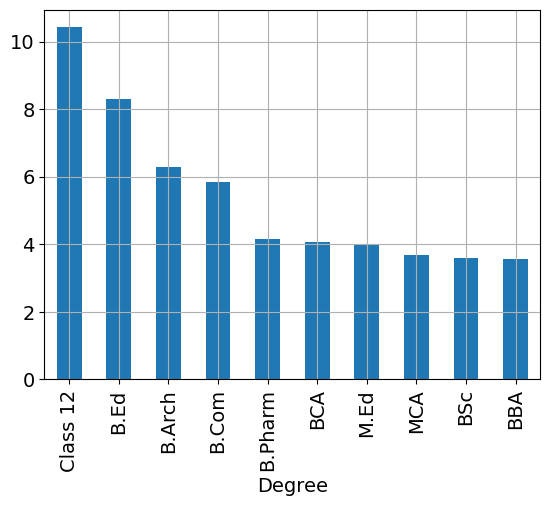

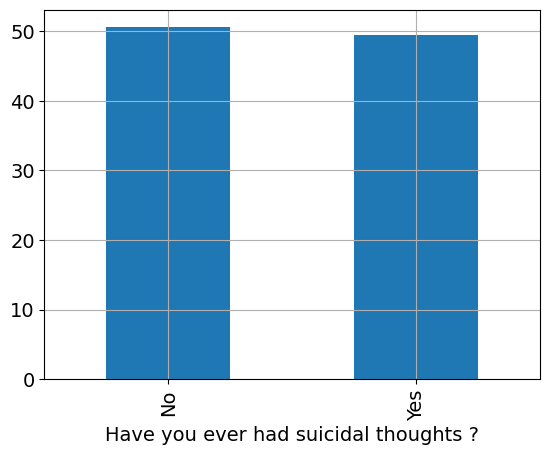

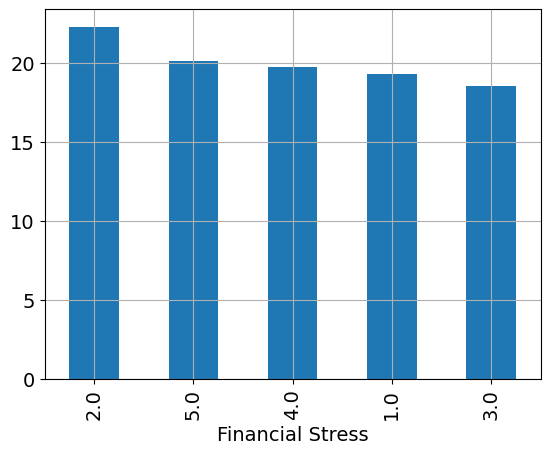

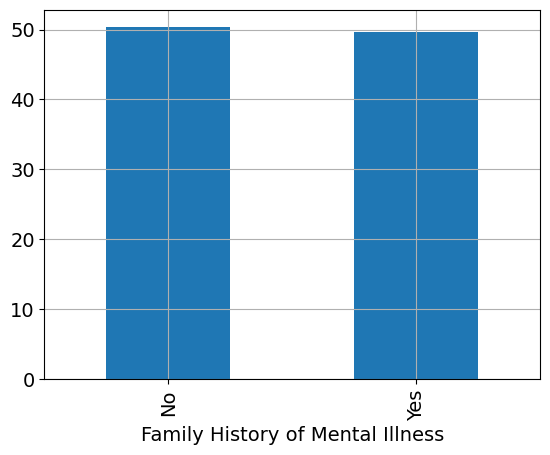

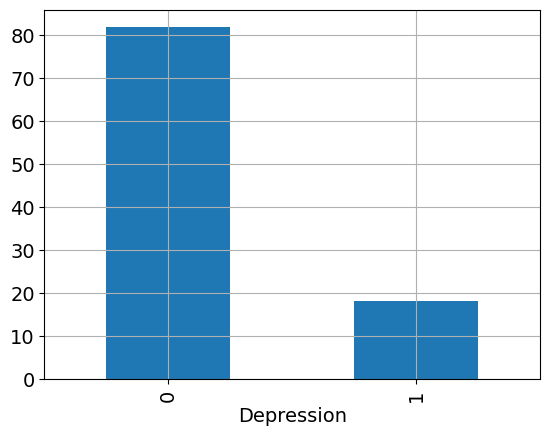

In [ ]:
for name in df.select_dtypes(exclude=np.number):
  (df[name].value_counts(normalize=True)*100).nlargest(10).plot.bar()
  plt.grid(True)
  plt.show()

1. in data teacher are 25% and much more than other
2.  percentage of sleep hour is much less for 3-4 hours 4-5 hours 4-6 hours no nad 2-3 hours also need preprocessing
3.  dietary habits may need preprocessing
4. maybe we can combine degree

In [ ]:
df["Sleep Duration"].value_counts()

,count
Sleep Duration,
Less than 5 hours,30904
7-8 hours,29660
More than 8 hours,26183
5-6 hours,25745
3-4 hours,10
6-7 hours,7
4-5 hours,6
2-3 hours,5
6-8 hours,4


In [ ]:
df["Dietary Habits"].value_counts()

,count
Dietary Habits,
Moderate,39750
Unhealthy,36943
Healthy,35846
No,2
More Healthy,1
No Healthy,1
Less Healthy,1


In [ ]:
df["Sleep Duration"].unique()

array(['7-8 hours', '5-6 hours', 'Less than 5 hours', 'More than 8 hours',
       '3-4 hours', '4-6 hours', '2-3 hours', '10-6 hours', '1-6 hours',
       '55-66 hours', nan, '6-8 hours', '4-5 hours', '9-6 hours', '45',
       '6-7 hours', '9-5 hours', '10-11 hours', 'No', '9-5',
       '35-36 hours', '8-9 hours', '8 hours', '40-45 hours', '3-6 hours',
       '9-11 hours', '45-48 hours', '1-2 hours', 'than 5 hours'],
      dtype=object)

In [ ]:
import numpy as np

# Sleep duration categories
short_sleep = [
    'Less than 5 hours', '3-4 hours', '2-3 hours', '4-5 hours',
    '5-6 hours', '4-6 hours', '1-6 hours', '3-6 hours', '1-2 hours',
    '1-3 hours', 'than 5 hours'
]

normal_sleep = [
    '6-7 hours', '7-8 hours', '6-8 hours', '8 hours', '10-6 hours',
    '9-6 hours', '45', '9-5 hours', '9-5', '35-36 hours', '8 hours',
    '40-45 hours', '45-48 hours'
]

long_sleep = [
    '55-66 hours', 'More than 8 hours', '8-9 hours', '9-11 hours', '10-11 hours'
]

# Function to categorize sleep duration
def sleep_cat(value):
    if value in short_sleep:
        return "Short sleep duration"
    elif value in normal_sleep:
        return "Normal sleep duration"
    elif value in long_sleep:
        return "Long sleep duration"
    else:
        return np.nan

# Apply the function to the 'Sleep Duration' column
df["sleep_duration_cat"] = df["Sleep Duration"].apply(sleep_cat)


In [ ]:
df["Degree"].unique()

array(['BCA', 'M.Pharm', 'MBA', 'BE', 'B.Pharm', 'BHM', 'MBBS', 'B.Ed',
       'B.Com', 'B.Arch', 'MCA', 'BSc', 'B.Tech', 'PhD', 'MD', 'BBA',
       'ME', 'M.Ed', 'MA', 'M.Tech', 'Class 12', 'LLB', 'BA', 'MSc',
       'LLM', 'MHM', 'M.Com', 'B.B.Arch', 'L.Ed', 'LLEd', '5.61', nan,
       'B.Sc', 'S.Pharm', 'MEd', 'BPharm', 'Advait', 'H_Pharm', 'Doctor',
       'Working Professional', 'M. Business Analyst', 'BH', 'MPharm',
       'LHM', 'Class 11', 'LCA', 'S.Tech', 'M.Arch', 'LLCom', '0',
       'B.Student', 'M.S', 'LLS', 'Business Analyst', 'Vrinda',
       'HR Manager', 'E.Tech', 'RCA', 'LLBA', 'P.Com', 'K.Ed', 'LL B.Ed',
       'MPA', 'Veda', 'LLTech', 'BArch', 'B BA'], dtype=object)

In [ ]:
# Defining degree categories
no_education = ["0"]

high_school = [
    'Class 11', 'Class 12'
]

bachelor = [
    'BCA', 'BE', 'B.Pharm', 'BHM', 'B.Ed', 'B.Com', 'B.Arch', 'BSc', 'B.Tech', 'BBA',
    'BA', 'LLB', 'B.Sc', 'BPharm', 'BArch', 'B BA',"BH","B.Student",'LL B.Ed',"BArch",'B BA',"MBBS"
]

master_and_higher = [
    'M.Pharm','MBA', 'MCA', 'PhD', 'MD', 'ME', 'M.Ed', 'MA', 'M.Tech', 'MSc', 'LLM',
    'MHM', 'M.Com', 'MEd', 'L.Ed', 'LLEd', 'MPharm', 'M.Arch', 'LLCom', 'LLBA','Advait', 'Doctor', 'M. Business Analyst', "MPA"]



# Function to map degree to categories
def categorize_degree(degree):
    if degree in no_education:
        return "No Education"
    elif degree in high_school:
        return "High School"
    elif degree in bachelor:
        return "Bachelor"
    elif degree in master_and_higher:
        return "Master and Higher"
    else:
        return "Unknown"

# Applying the function
df["Degree Category"] = df["Degree"].apply(categorize_degree)


In [ ]:
df["Dietary Habits"].unique()

array(['Healthy', 'Moderate', 'Unhealthy', nan, 'More Healthy', 'No',
       'No Healthy', 'Less Healthy'], dtype=object)

In [ ]:
 # Function to map dietary habits
def map_dietary_habits(value):
    if value in [ "No Healthy","Unhealthy","No"]:
        return "Unhealthy"
    elif value in ["More Healthy","Healthy"]:
        return "Healthy"
    elif value in [ "Less Healthy","Moderate"]:
        return "Moderate"
    else:
        return np.nan

# Apply the function to the 'Dietary Habits' column
df["Dietary Habits"] = df["Dietary Habits"].apply(map_dietary_habits)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112560 entries, 127399 to 60902
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 112560 non-null  object 
 1   Age                                    112560 non-null  float64
 2   Working Professional or Student        112560 non-null  object 
 3   Profession                             83309 non-null   object 
 4   Academic Pressure                      22268 non-null   object 
 5   Work Pressure                          90277 non-null   object 
 6   CGPA                                   22268 non-null   float64
 7   Study Satisfaction                     22266 non-null   object 
 8   Job Satisfaction                       90285 non-null   object 
 9   Sleep Duration                         112554 non-null  object 
 10  Dietary Habits                         112544 non-null  o

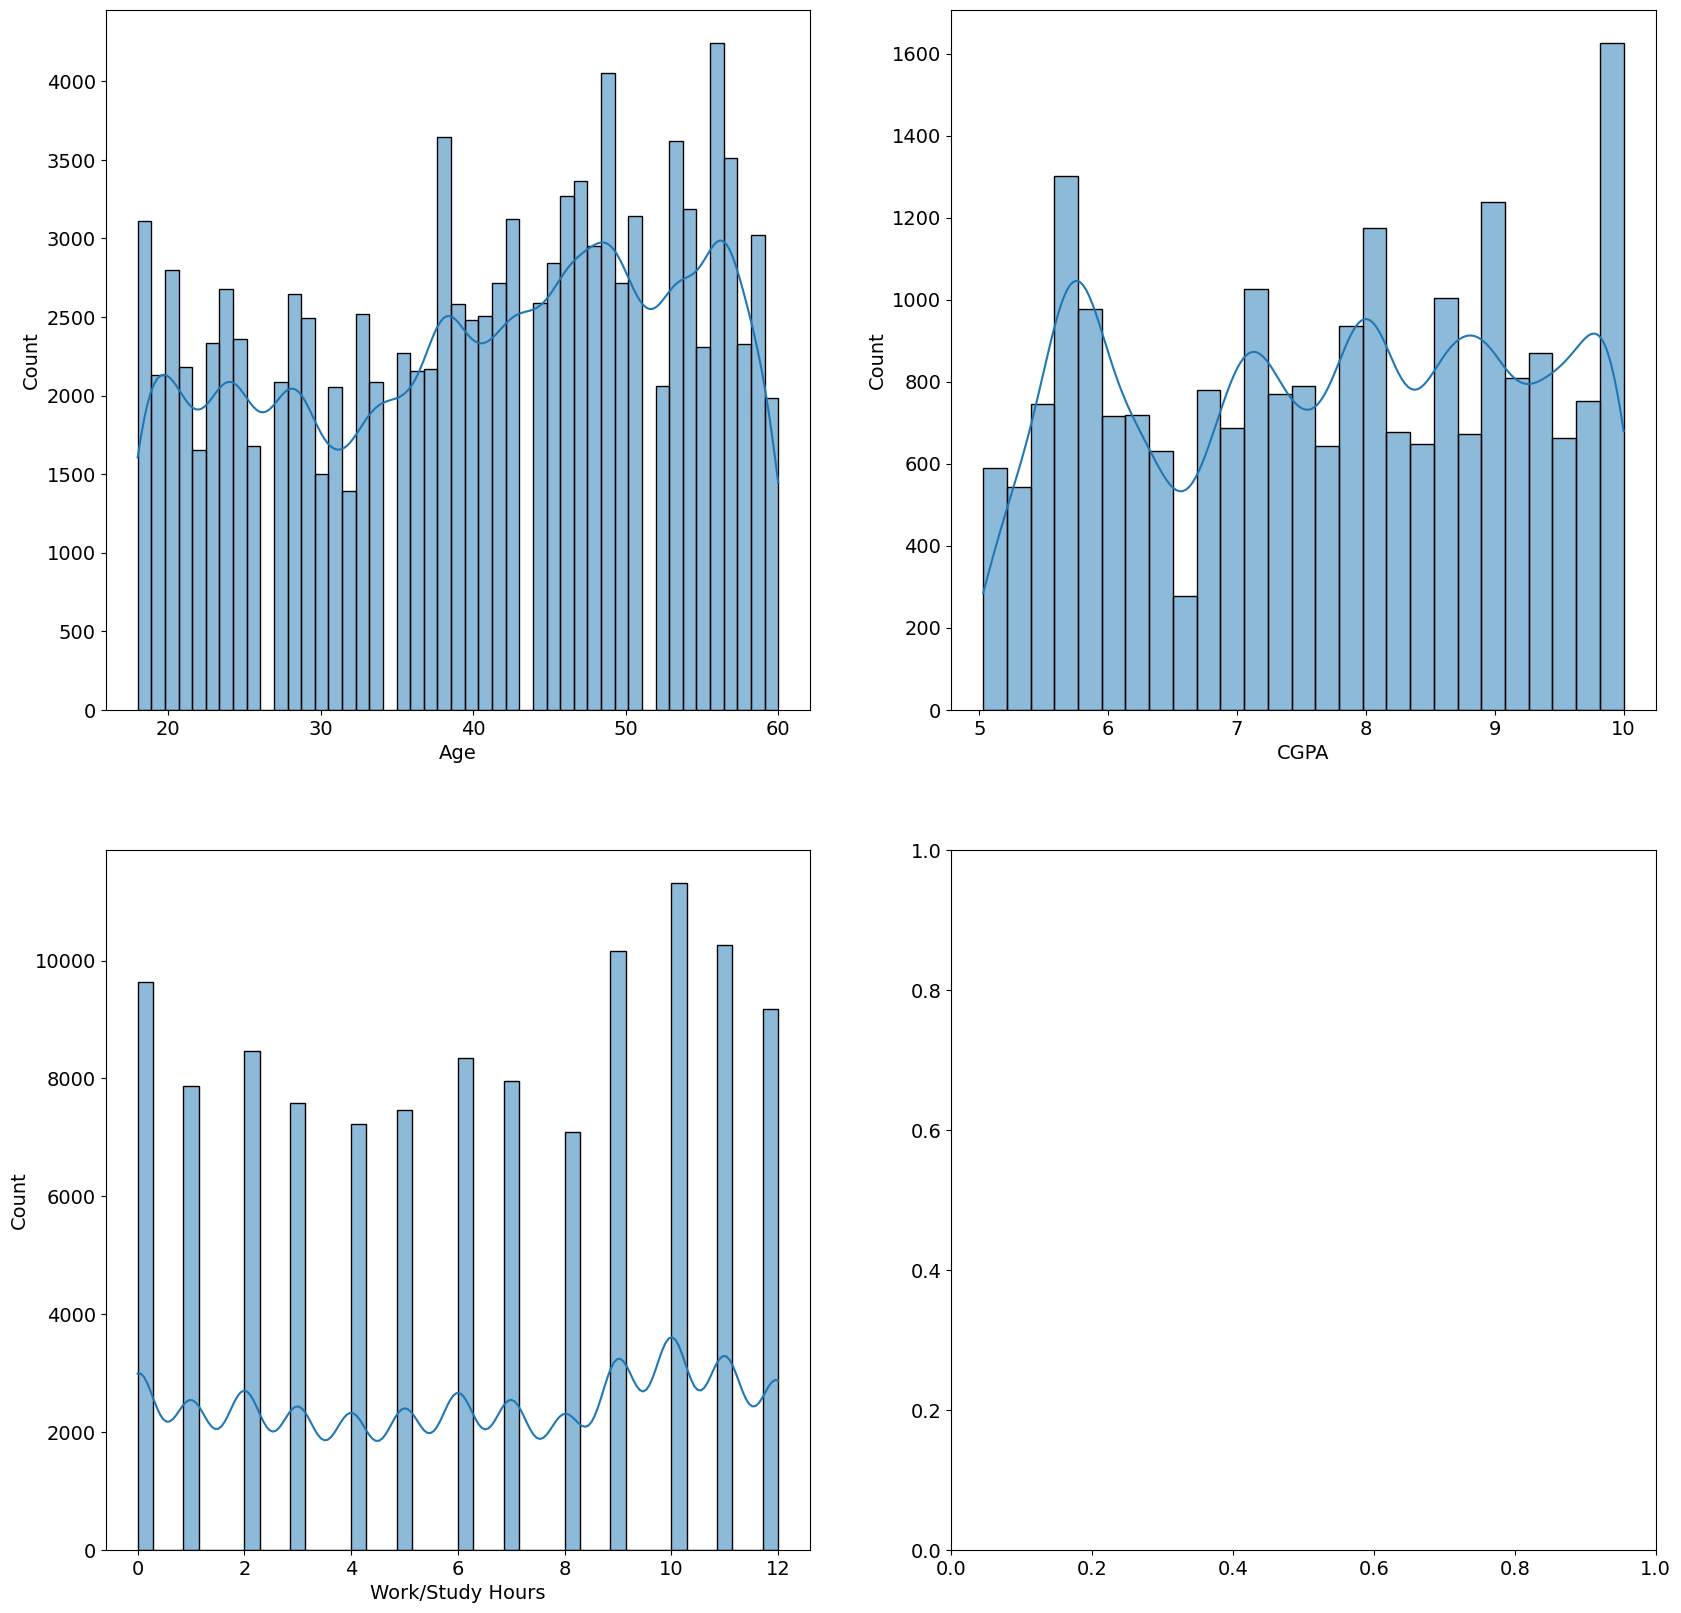

In [ ]:
import warnings

warnings.filterwarnings('ignore')

fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes = axes.flatten()
for i,name in enumerate(df.select_dtypes(include=np.number)):
  ax = axes[i]
  sns.histplot(df[name],ax=ax,kde=True)

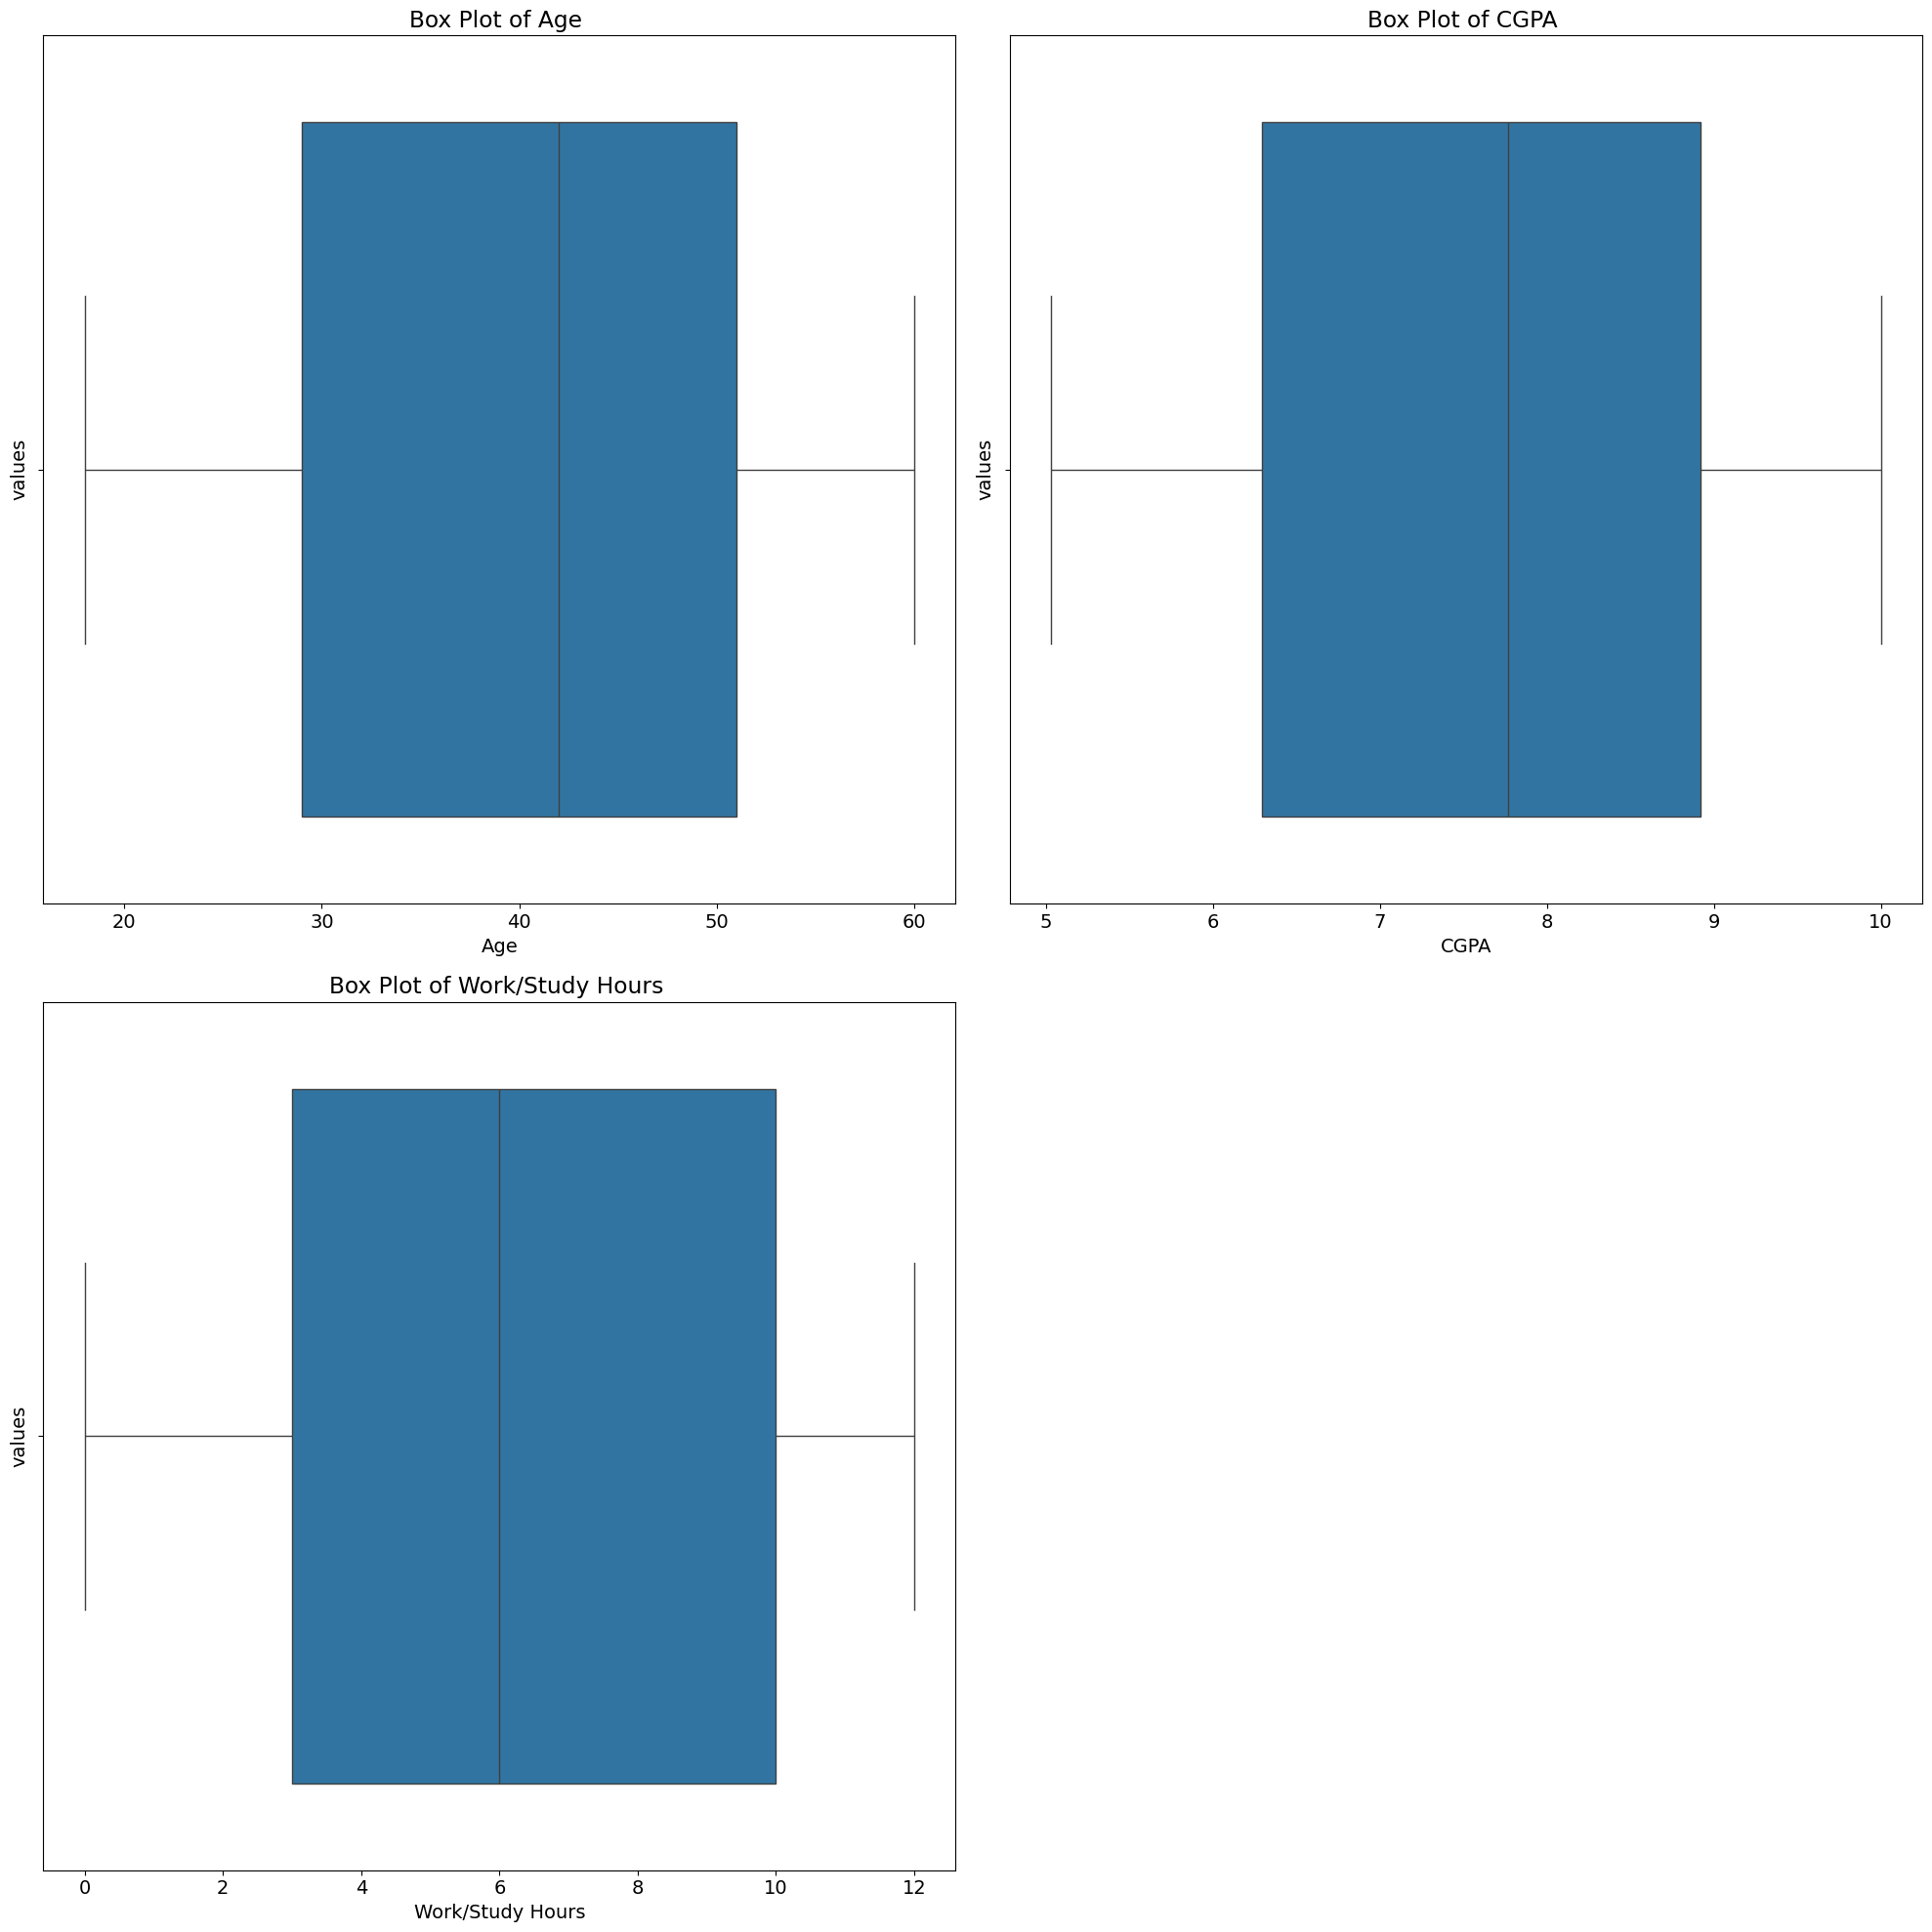

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes = axes.flatten()
for i,name in enumerate(df.select_dtypes(include=np.number)):
    ax=axes[i]
    sns.boxplot(x=name,data=df, ax=ax)
    axes[i].set_title(f'Box Plot of {name} ')
    axes[i].set_xlabel(name)
    axes[i].set_ylabel('values')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

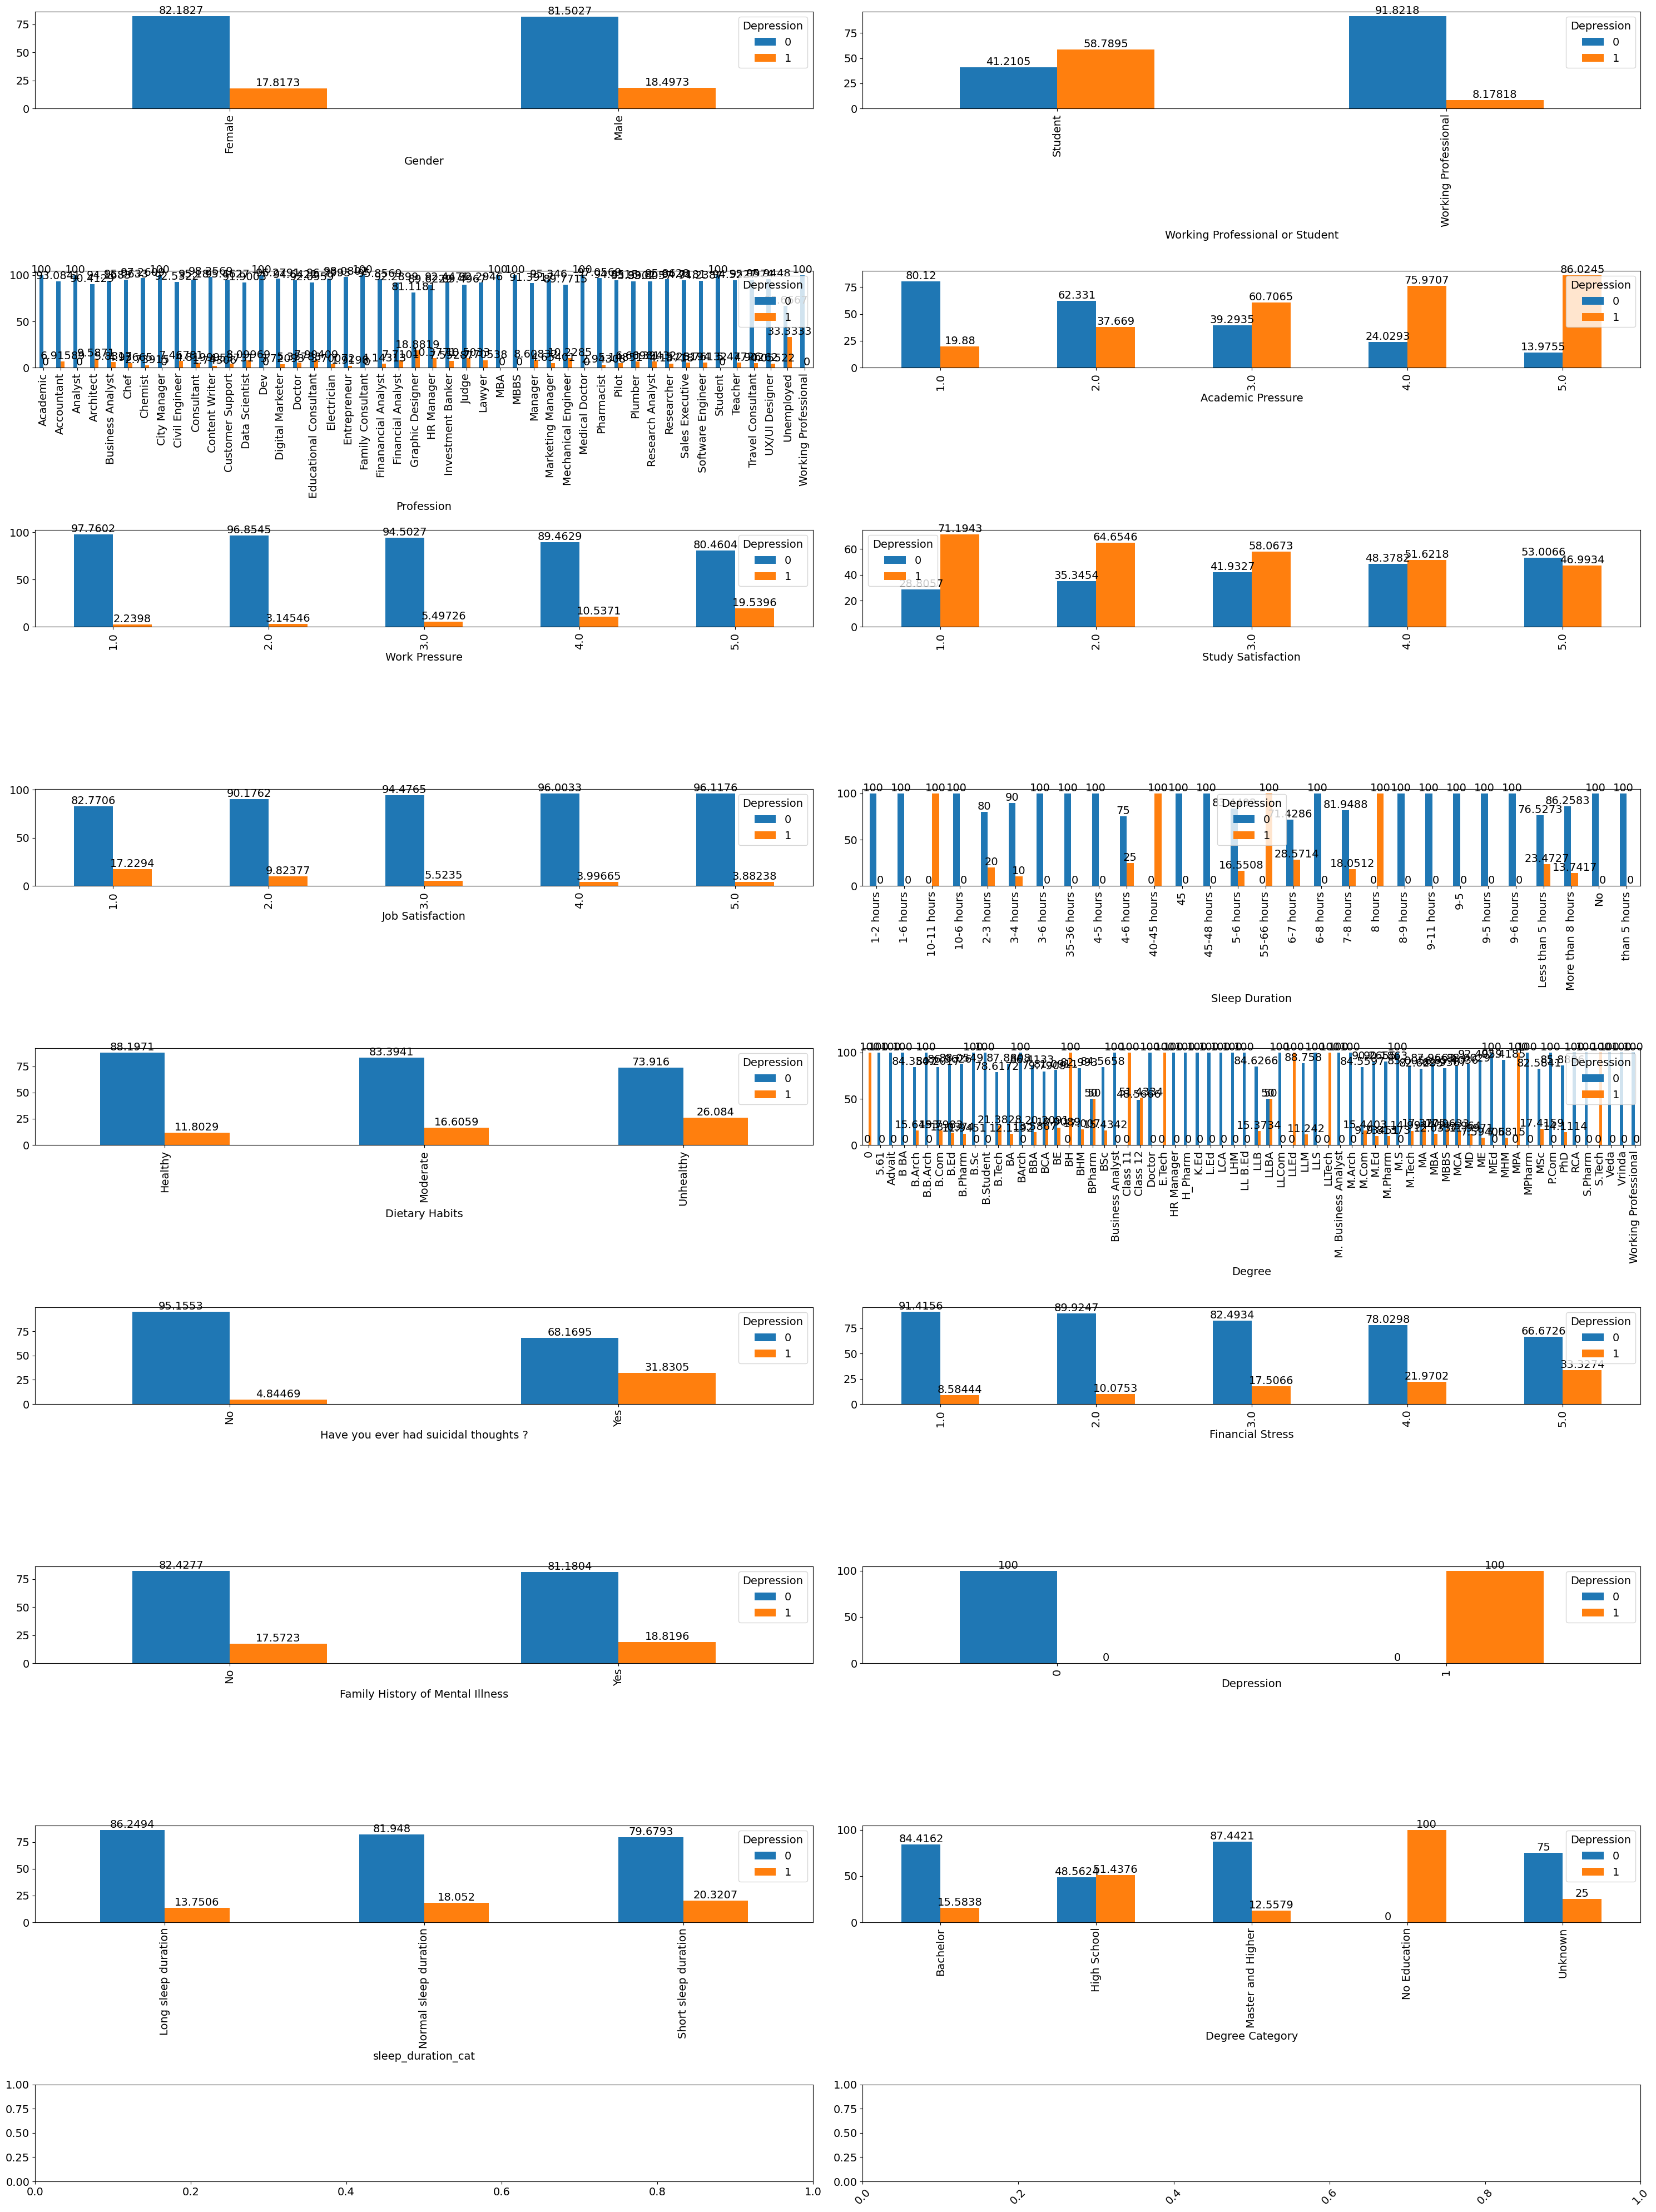

In [ ]:
plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(9, 2, figsize=(30, 40))
axes = axes.flatten()
for i,name in enumerate(df.select_dtypes(exclude=np.number)):
  ax = axes[i]
  ct=(pd.crosstab(df[name],df["Depression"],normalize="index")*100)
  plot = ct.plot(kind='bar',ax=ax)
  for c in plot.containers:
    plot.bar_label(c)
  plt.xticks(rotation=45)
  plt.tight_layout()

1. student number in depression are higher than working profession
2. academic pressure high -> depression yes
3. for work pressure,high work pressure -> deprssion yes
4. studey statisfaction low -> high depression
5. job satisfaction low -> high depression
6. sucidal thought yes -> in depression
7. financial stress high -> depression high

<Figure size 1500x800 with 0 Axes>

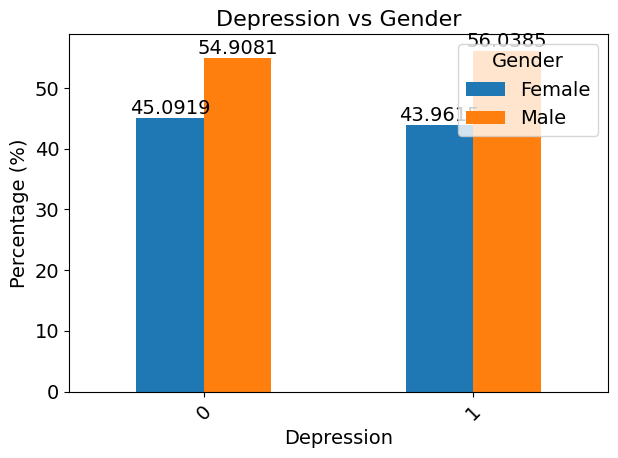

<Figure size 1500x800 with 0 Axes>

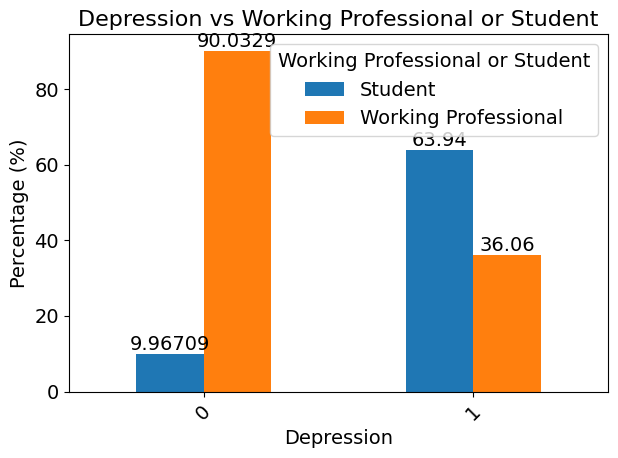

<Figure size 1500x800 with 0 Axes>

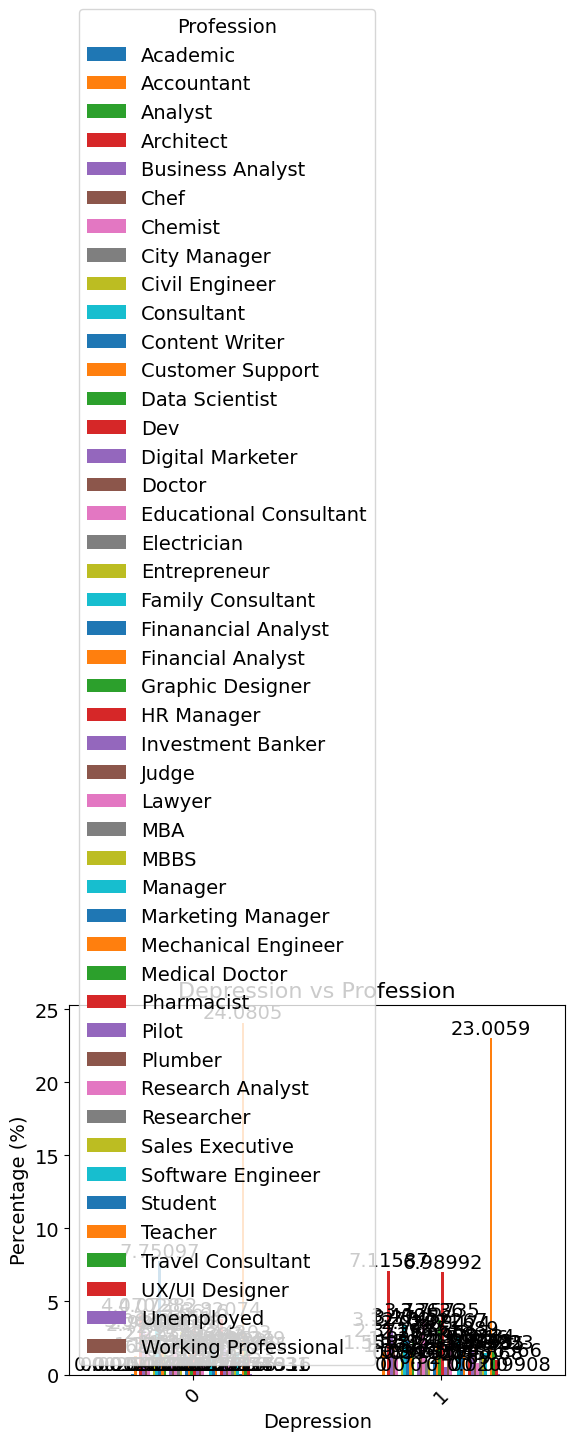

<Figure size 1500x800 with 0 Axes>

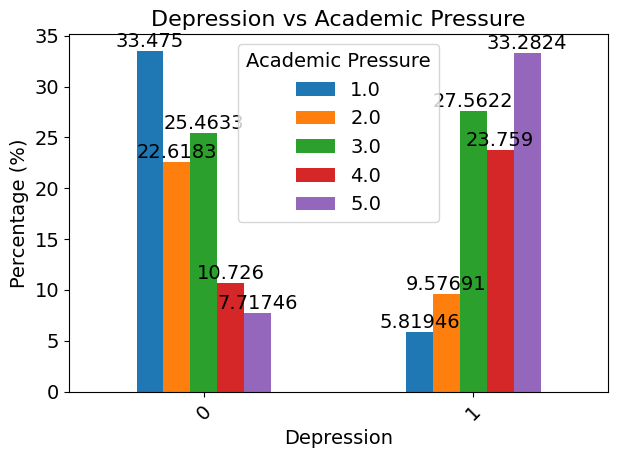

<Figure size 1500x800 with 0 Axes>

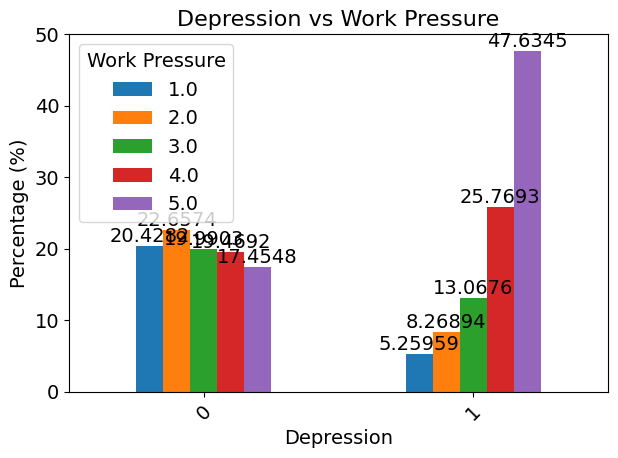

<Figure size 1500x800 with 0 Axes>

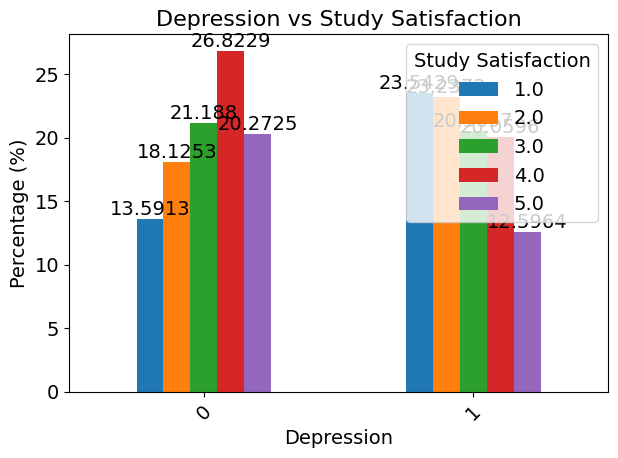

<Figure size 1500x800 with 0 Axes>

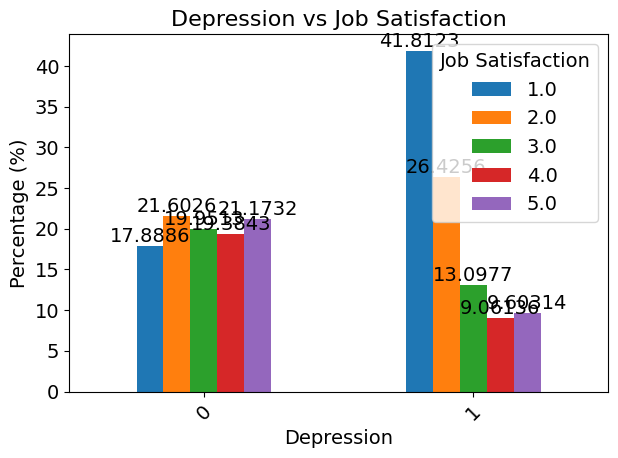

<Figure size 1500x800 with 0 Axes>

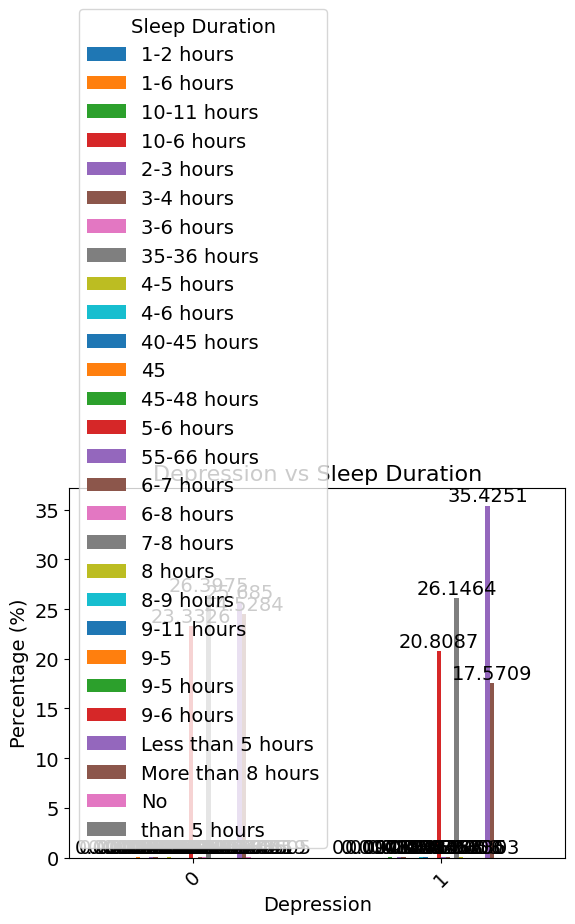

<Figure size 1500x800 with 0 Axes>

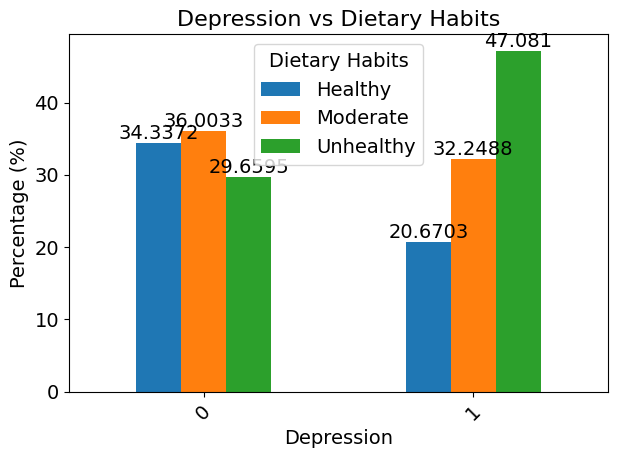

<Figure size 1500x800 with 0 Axes>

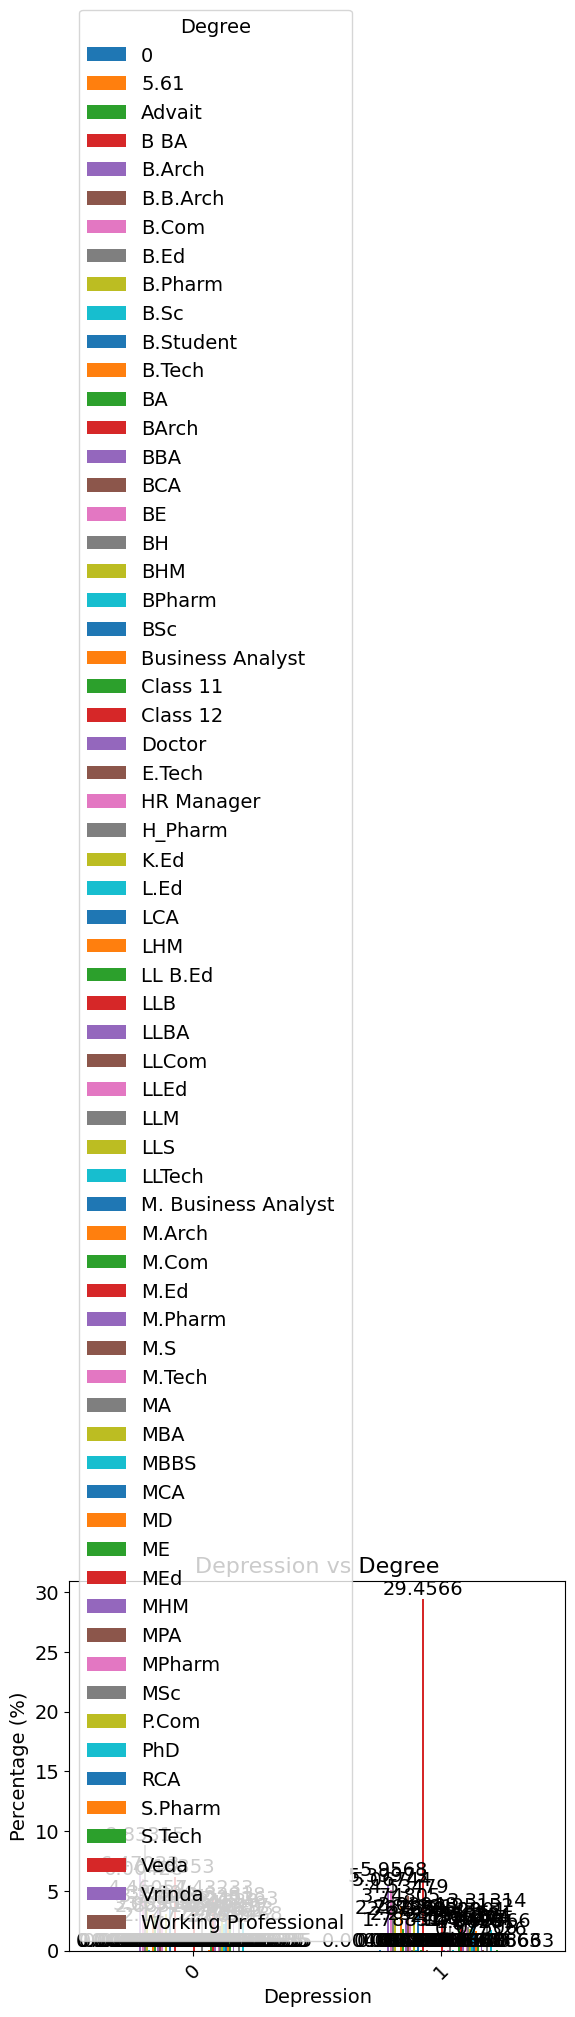

<Figure size 1500x800 with 0 Axes>

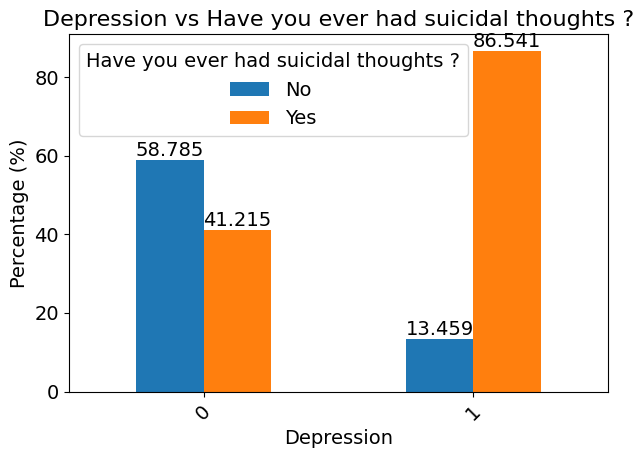

<Figure size 1500x800 with 0 Axes>

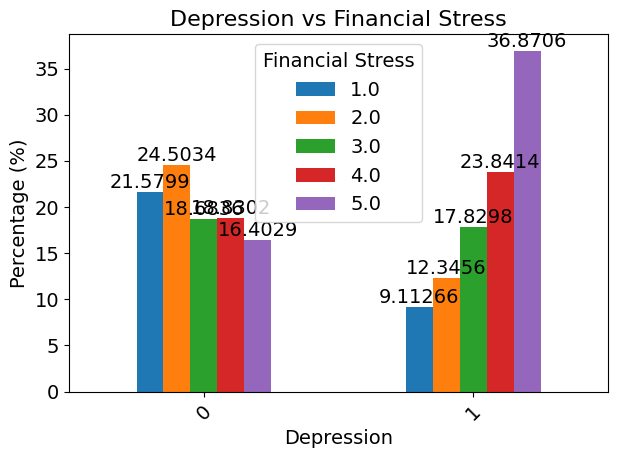

<Figure size 1500x800 with 0 Axes>

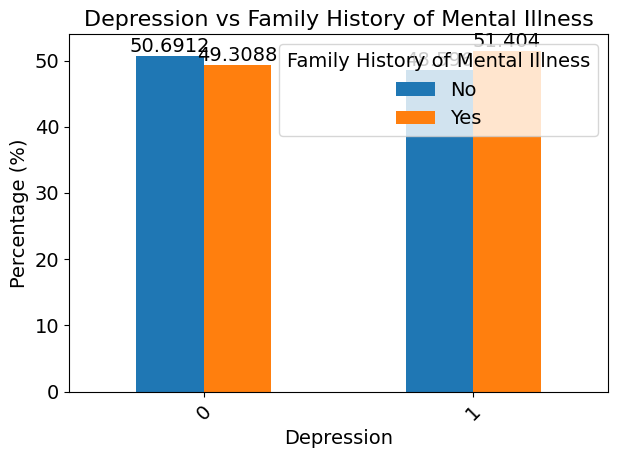

<Figure size 1500x800 with 0 Axes>

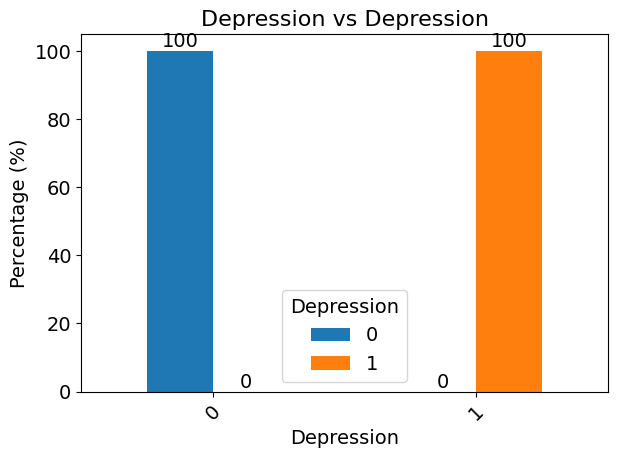

<Figure size 1500x800 with 0 Axes>

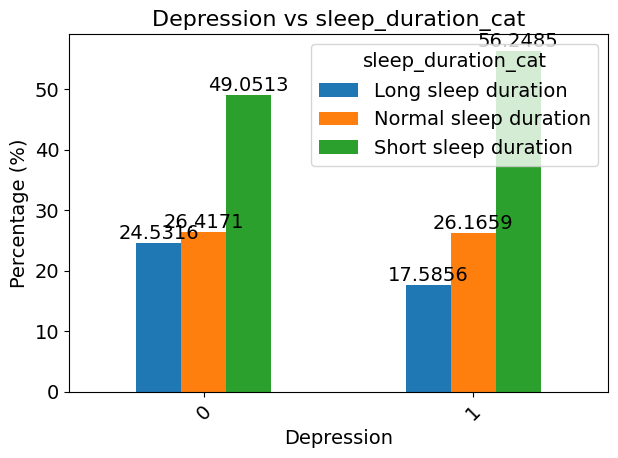

<Figure size 1500x800 with 0 Axes>

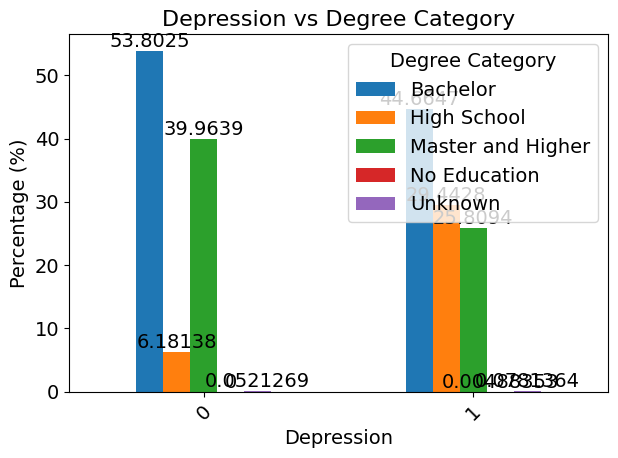

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Loop through each non-numeric column and create a separate figure for each plot
for name in df.select_dtypes(exclude=np.number).columns:
    # Create a new figure
    plt.figure(figsize=(15, 8))

    # Create a crosstab of 'Depression' vs the current categorical feature
    ct = (pd.crosstab(df["Depression"], df[name], normalize="index") * 100)

    # Plot the crosstab as a bar plot
    plot = ct.plot(kind='bar')

    # Add labels to the bars
    for container in plot.containers:
        plot.bar_label(container)

    # Customize plot appearance
    plt.title(f'Depression vs {name}', fontsize=16)
    plt.xlabel("Depression", fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()


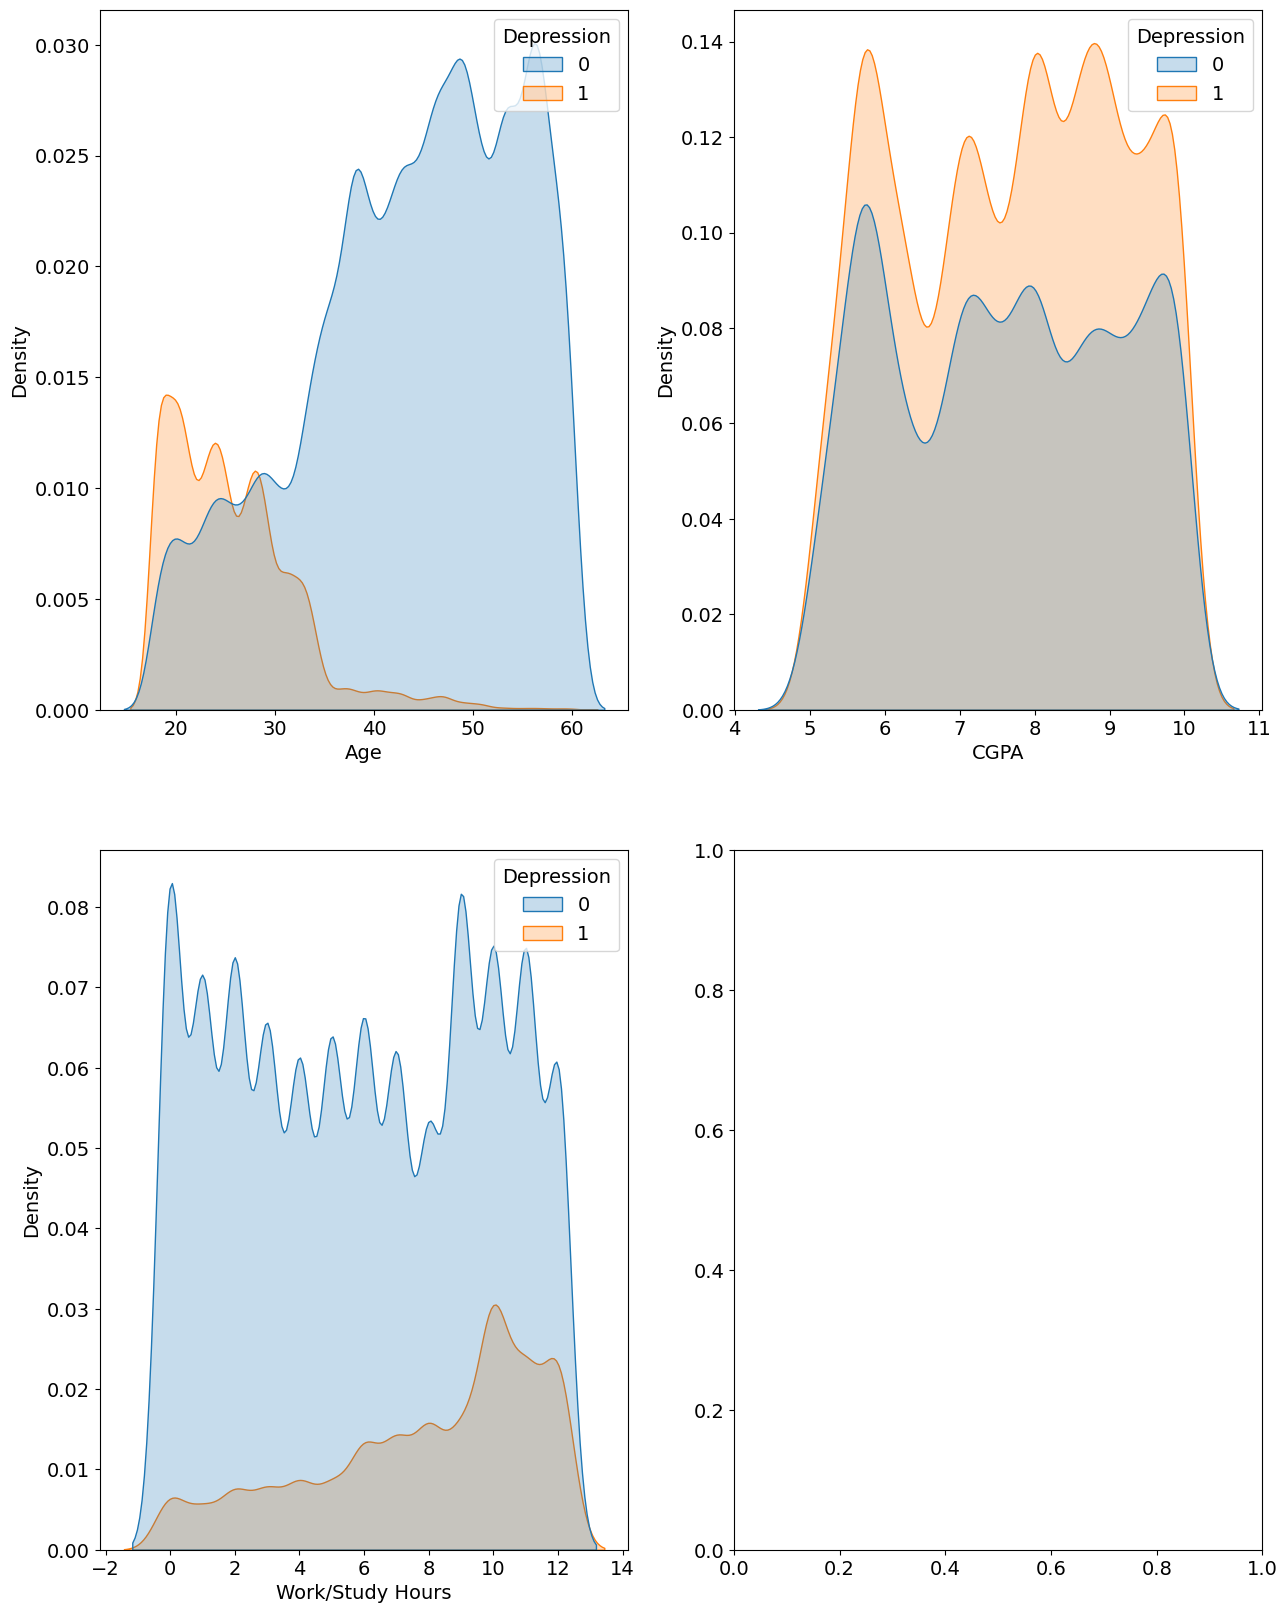

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(15, 20))
axes = axes.flatten()
for i,name in enumerate(df.select_dtypes(include=np.number)):
  ax = axes[i]
  sns.kdeplot(x=name,hue="Depression",data=df,ax=ax,fill=True)

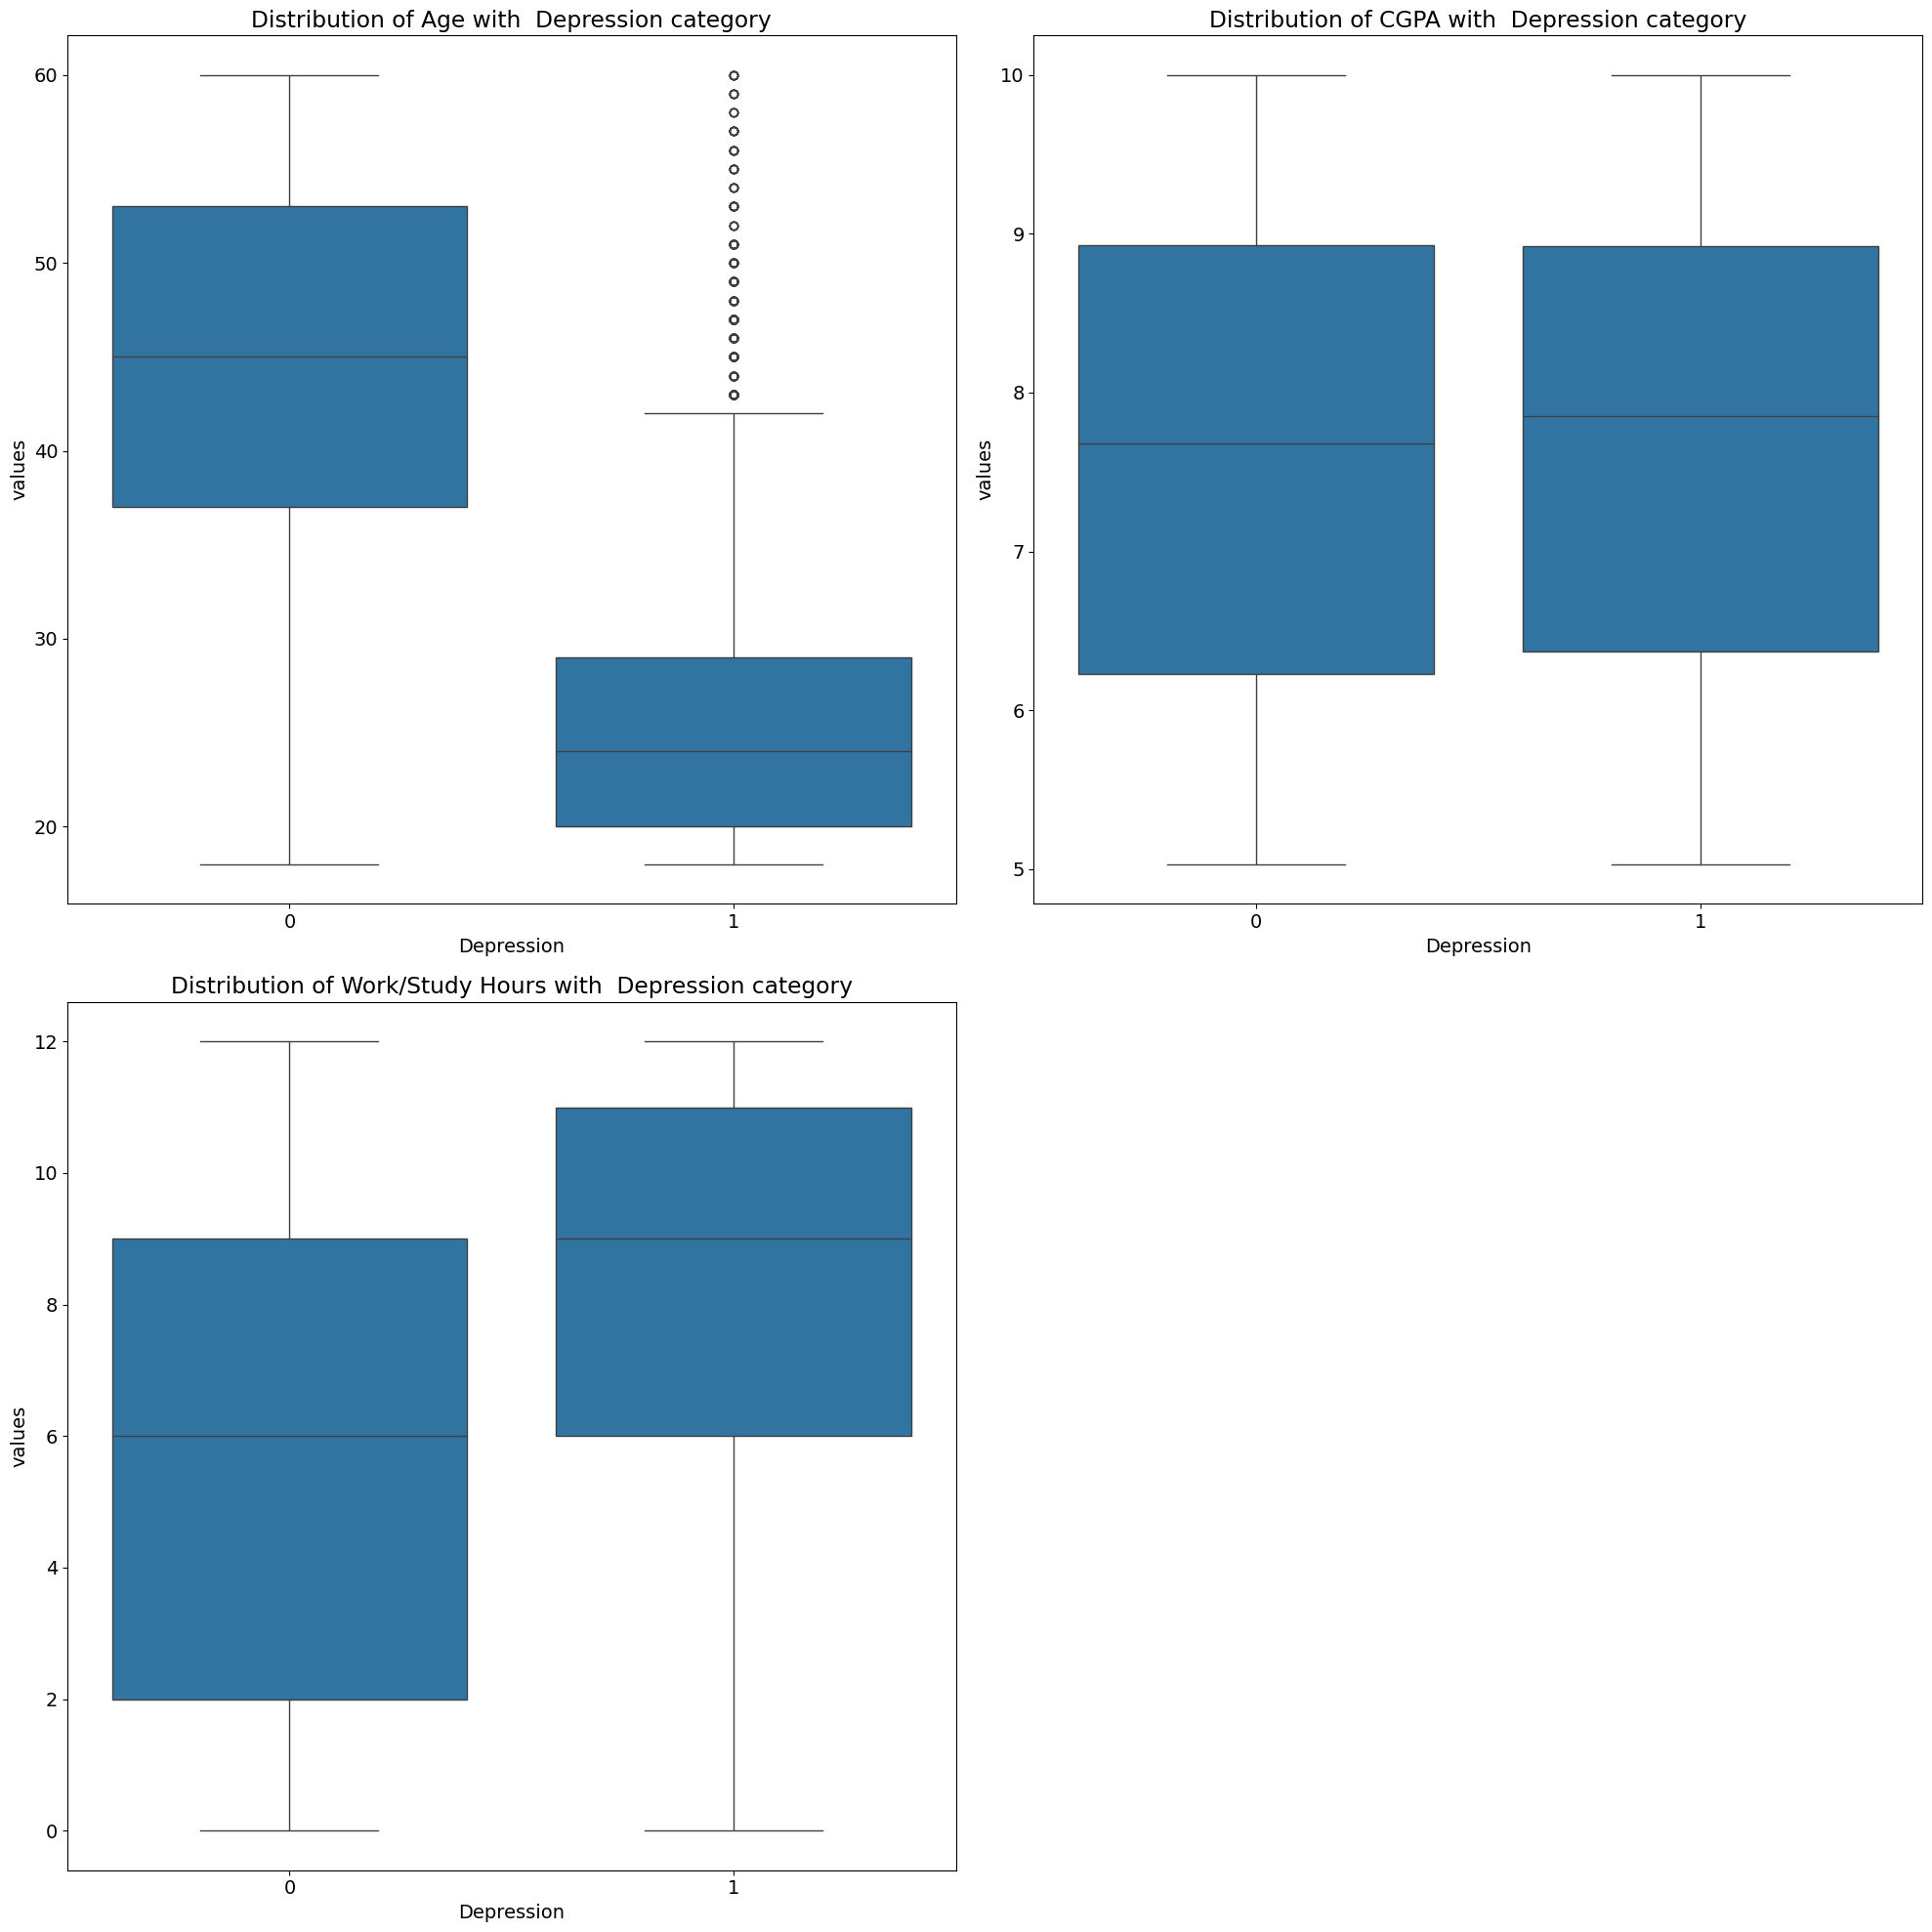

In [ ]:
import warnings

warnings.filterwarnings('ignore')
df["Depression"]=df["Depression"].astype("category")
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes = axes.flatten()
for i,name in enumerate(df.select_dtypes(include=np.number)):
    sns.boxplot(x="Depression",y=name,data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {name} with  Depression category')
    axes[i].set_xlabel("Depression")
    axes[i].set_ylabel('values')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

1. lower age-> high depression
2. study hour high-> depression high

In [ ]:
# Complex analysis

In [ ]:
wp_stu=df.groupby("Working Professional or Student")

In [ ]:
wp_stu.get_group("Student").head()

,Gender,Age,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,sleep_duration_cat,Degree Category
127399,Female,28.0,Student,NaN,4.0,NaN,6.53,2.0,NaN,7-8 hours,Healthy,BCA,No,0.0,3.0,No,0,Normal sleep duration,Bachelor
127553,Female,25.0,Student,NaN,1.0,NaN,7.09,5.0,NaN,5-6 hours,Unhealthy,MBA,Yes,12.0,4.0,Yes,1,Short sleep duration,Master and Higher
5931,Male,27.0,Student,NaN,4.0,NaN,8.69,2.0,NaN,More than 8 hours,Unhealthy,B.Ed,Yes,5.0,5.0,Yes,1,Long sleep duration,Bachelor
100039,Male,28.0,Student,NaN,4.0,NaN,8.50,2.0,NaN,5-6 hours,Moderate,B.Com,Yes,10.0,1.0,Yes,0,Short sleep duration,Bachelor
132317,Female,23.0,Student,NaN,1.0,NaN,9.39,3.0,NaN,Less than 5 hours,Unhealthy,MCA,No,3.0,1.0,No,0,Short sleep duration,Master and Higher


In [ ]:
wp_stu.get_group("Student").describe(include="all")

,Gender,Age,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,sleep_duration_cat,Degree Category
count,22271,22271.000000,22271,24,22264.0,3.0,22263.000000,22261.0,8.0,22271,22262,22255,22271,22271.000000,22270.0,22271,22271.0,22271,22271
unique,2,NaN,1,10,5.0,2.0,NaN,5.0,4.0,15,3,42,2,NaN,5.0,2,2.0,3,5
top,Male,NaN,Student,Architect,3.0,5.0,NaN,4.0,2.0,Less than 5 hours,Unhealthy,Class 12,Yes,NaN,5.0,No,1.0,Short sleep duration,Bachelor
freq,12394,NaN,22271,6,5944.0,2.0,NaN,5086.0,3.0,6576,8270,4844,14112,NaN,5368.0,11499,13093.0,11513,10639
mean,NaN,25.815006,NaN,NaN,NaN,NaN,7.662213,NaN,NaN,NaN,NaN,NaN,NaN,7.173364,NaN,NaN,NaN,NaN,NaN
std,NaN,4.897732,NaN,NaN,NaN,NaN,1.463831,NaN,NaN,NaN,NaN,NaN,NaN,3.702859,NaN,NaN,NaN,NaN,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,5.030000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,21.000000,NaN,NaN,NaN,NaN,6.290000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,25.000000,NaN,NaN,NaN,NaN,7.770000,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,30.000000,NaN,NaN,NaN,NaN,8.920000,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
wp_stu.get_group("Working Professional").describe(include="all")

,Gender,Age,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,sleep_duration_cat,Degree Category
count,90289,90289.000000,90289,83285,4.0,90274.0,5.000000,5.0,90277.0,90283,90282,90260,90289,90289.000000,90288.0,90289,90289.0,90279,90289
unique,2,NaN,1,46,3.0,5.0,NaN,4.0,5.0,22,3,54,2,NaN,5.0,2,2.0,3,4
top,Male,NaN,Working Professional,Teacher,4.0,2.0,NaN,2.0,2.0,Less than 5 hours,Moderate,B.Ed,No,NaN,2.0,Yes,0.0,Short sleep duration,Bachelor
freq,49642,NaN,90289,20005,2.0,19392.0,NaN,2.0,19857.0,24328,31836,7864,48728,NaN,21107.0,45159,82905.0,45168,48050
mean,NaN,44.000509,NaN,NaN,NaN,NaN,7.886000,NaN,NaN,NaN,NaN,NaN,NaN,6.027545,NaN,NaN,NaN,NaN,NaN
std,NaN,10.945237,NaN,NaN,NaN,NaN,1.547831,NaN,NaN,NaN,NaN,NaN,NaN,3.857749,NaN,NaN,NaN,NaN,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,5.420000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,38.000000,NaN,NaN,NaN,NaN,8.040000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,46.000000,NaN,NaN,NaN,NaN,8.110000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,53.000000,NaN,NaN,NaN,NaN,8.140000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN


* merge acadmic pressure and work pressure in one group and study satisfaction and job sataisfaction as one group
* CGPA is only for student so we may be remove it
* lets remove profession in which high cordinality
*

In [ ]:
# def wrangle(df):
#     drop_columns=["id","Name","City"]
#     #df.drop(columns=drop_columns,inplace=True)
#     df['Dietary Habits'] = df['Dietary Habits'].apply(map_dietary_habits)
#     df['Profession'] = df['Profession'].apply(lambda x: 'Student' if x in degree_to_student else x)
#     df['Profession'] = df['Profession'].apply(lambda x: x if x in valid_professions else np.nan)
#     df["Degree"] = df["Degree"].apply(lambda x: x if x in valid_degrees else np.nan)
#     df["Sleep Duration"] = df["Sleep Duration"].apply(lambda x: np.nan if x in irrelevant_values_sleep_duaration else x)
#     df["Sleep Duration"] = df["Sleep Duration"].apply(categorize_sleep)
#     convert_to_cat=["Academic Pressure","Work Pressure","Study Satisfaction","Job Satisfaction","Financial Stress"]
#     df[convert_to_cat]=df[convert_to_cat].astype("object")
#     return df
# df=wrangle(df)

In [ ]:
df.select_dtypes(np.number).corr()

,Age,CGPA,Work/Study Hours
Age,1.000000,0.004003,-0.120839
CGPA,0.004003,1.000000,0.004564
Work/Study Hours,-0.120839,0.004564,1.000000


In [ ]:
# corr=pd.get_dummies(df).corr()
# corr

In [ ]:
# plt.figure(figsize=(30,30))
# sns.heatmap(corr[corr.abs()>0.5])

In [ ]:
# selected_columns = {}
# threshold = 0.5
# for column in corr.columns:
#     filtered = corr[column][corr[column].abs() > threshold]
#     if len(filtered) > 1:  # Only keep if there's more than the self-correlation
#         selected_columns[column] = filtered.drop(column).to_dict()  # Exclude self-correlation

# selected_columns

In [ ]:
# plt.figure(figsize=(30,30))
# sns.heatmap(corr,annot=True)

# Feature extraction

In [ ]:
df.columns

Index(['Gender', 'Age', 'Working Professional or Student', 'Profession',
       'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
       'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'sleep_duration_cat', 'Degree Category'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Working Professional or Student,0
Profession,29251
Academic Pressure,90292
Work Pressure,22283
CGPA,90292
Study Satisfaction,90294
Job Satisfaction,22275
Sleep Duration,6


In [ ]:
df["Profession_imputed"]=df.apply(lambda row: "Student" if  row["Working Professional or Student"]=="Student" else row["Profession"],axis=1)

In [ ]:
df["Academic Pressure_imputed"]=df.apply(lambda row: 0 if  row["Working Professional or Student"]=="Working Professional" else row["Academic Pressure"],axis=1)

In [ ]:

df["Work Pressure_imputed"]=df.apply(lambda row: 0 if  row["Working Professional or Student"]=="Student" else row["Work Pressure"],axis=1)

In [ ]:
#CGPA
df["CGPA_imputed"]=df.apply(lambda row: 0 if  row["Working Professional or Student"]=="Working Professional" else row["CGPA"],axis=1)

In [ ]:
df["Study Satisfaction_imputed"]=df.apply(lambda row: 0 if  row["Working Professional or Student"]=="Working Professional" else row["Study Satisfaction"],axis=1)

In [ ]:
#Job Satisfaction
df["Job Satisfaction_imputed"]=df.apply(lambda row: 0 if  row["Working Professional or Student"]=="Student" else row["Job Satisfaction"],axis=1)

In [ ]:
df["Sleep Duration"].unique()

array(['7-8 hours', '5-6 hours', 'Less than 5 hours', 'More than 8 hours',
       '3-4 hours', '4-6 hours', '2-3 hours', '10-6 hours', '1-6 hours',
       '55-66 hours', nan, '6-8 hours', '4-5 hours', '9-6 hours', '45',
       '6-7 hours', '9-5 hours', '10-11 hours', 'No', '9-5',
       '35-36 hours', '8-9 hours', '8 hours', '40-45 hours', '3-6 hours',
       '9-11 hours', '45-48 hours', '1-2 hours', 'than 5 hours'],
      dtype=object)

In [ ]:
# Blank mapping dictionary for manual entries
hours_mapping = {
    '7-8 hours': 7.5,
    '5-6 hours': 5.5,
    'Less than 5 hours': 2.5,
    'More than 8 hours': 10,
    '3-4 hours': 3.5,
    '4-6 hours': 5,
    '2-3 hours': 3.5,
    '10-6 hours': 8,
    '1-6 hours': 3.5,
    '55-66 hours':57.5/7,
    np.nan: np.nan,
    '6-8 hours': 7,
    '4-5 hours': 4.5,
    '9-6 hours': 7.5,
    '45': 45/7,
    '6-7 hours': 6.5,
    '9-5 hours': 7,
    '10-11 hours': 10.5,
    'No': 0,
    '9-5': 7,
    '35-36 hours': 35.5/7,
    '8-9 hours': 8.5,
    '8 hours': 8,
    '40-45 hours': 42.5/7,
    '3-6 hours': 4.5,
    '9-11 hours': 10,
    '45-48 hours': 46.5/7,
    '1-2 hours': 1.5,
    'than 5 hours': 2.5
}
df["sleep_duration_hours"] = df["Sleep Duration"].map(hours_mapping)


In [ ]:
df.head()

,Gender,Age,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,sleep_duration_cat,Degree Category,Profession_imputed,Academic Pressure_imputed,Work Pressure_imputed,CGPA_imputed,Study Satisfaction_imputed,Job Satisfaction_imputed,sleep_duration_hours
127399,Female,28.0,Student,NaN,4.0,NaN,6.53,2.0,NaN,7-8 hours,Healthy,BCA,No,0.0,3.0,No,0,Normal sleep duration,Bachelor,Student,4.0,0.0,6.53,2.0,0.0,7.5
23578,Male,47.0,Working Professional,Research Analyst,NaN,3.0,NaN,NaN,4.0,5-6 hours,Moderate,M.Pharm,Yes,7.0,5.0,No,0,Short sleep duration,Master and Higher,Research Analyst,0.0,3.0,0.00,0.0,4.0,5.5
127553,Female,25.0,Student,NaN,1.0,NaN,7.09,5.0,NaN,5-6 hours,Unhealthy,MBA,Yes,12.0,4.0,Yes,1,Short sleep duration,Master and Higher,Student,1.0,0.0,7.09,5.0,0.0,5.5
85588,Male,59.0,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Unhealthy,BE,No,0.0,4.0,No,0,Short sleep duration,Bachelor,Pilot,0.0,3.0,0.00,0.0,5.0,2.5
44808,Female,45.0,Working Professional,Pharmacist,NaN,3.0,NaN,NaN,4.0,7-8 hours,Healthy,B.Pharm,No,8.0,1.0,Yes,0,Normal sleep duration,Bachelor,Pharmacist,0.0,3.0,0.00,0.0,4.0,7.5


In [ ]:
X = df.drop(columns="Depression")
y = df["Depression"]
# Handle categorical columns
X_cat = X.select_dtypes(exclude=np.number).fillna(X.select_dtypes(exclude=np.number).mode().iloc[0])

# Handle numeric columns
X_num = X.select_dtypes(include=np.number).fillna(X.select_dtypes(include=np.number).mean())

# Combine categorical and numeric columns
df = pd.concat([X_cat, X_num,y], axis=1)

In [ ]:
df["Dietary Habits"].unique()

array(['Healthy', 'Moderate', 'Unhealthy'], dtype=object)

In [ ]:
import pandas as pd
import numpy as np

def create_features(df):
    """
    Create new features based on the existing columns of the dataset.

    Parameters:
        df (pd.DataFrame): Input dataframe with raw data.

    Returns:
        pd.DataFrame: Dataframe with new features added.
    """
    # Avoid modifying the original dataframe
    df = df.copy()

    # Pressure-to-Satisfaction Ratio
    df['Pressure_to_Satisfaction_Ratio'] = (
        (df['Academic Pressure_imputed'] + df['Work Pressure_imputed']) /
        (df['Study Satisfaction_imputed'] + df['Job Satisfaction_imputed'] + 1e-8)  # To avoid division by zero
    )

    # Pressure Impact on CGPA
    df['Pressure_Impact_on_CGPA'] = (
        df['CGPA_imputed'] / (df['Academic Pressure_imputed'] + df['Work Pressure_imputed'] + 1e-8)
    )

    # Work-Life Balance
    df['Work_Life_Balance'] = (
        (df['Job Satisfaction_imputed'] + df['sleep_duration_hours']) /
        (df['Work/Study Hours'] + 1e-8)
    )

    # Stress Level (Composite)
    df['Stress_Level'] = (
        df['Academic Pressure_imputed'] + df['Work Pressure_imputed'] + df['Financial Stress']
    )

    # Age Group
    df['Age_Group'] = pd.cut(
        df['Age'], bins=[0, 25, 40, 60, 100],
        labels=['Youth', 'Young Adults', 'Middle-aged', 'Senior']
    )

    # Sleep-to-Work Ratio
    df['Sleep_to_Work_Ratio'] = (
        df['sleep_duration_hours'] / (df['Work/Study Hours'] + 1e-8)
    )

    # CGPA Efficiency
    df['CGPA_Efficiency'] = (
        df['CGPA_imputed'] / (df['Work/Study Hours'] + 1e-8)
    )

    # Dietary Health Score (Mapping)
    dietary_mapping = {
        'Healthy': 3,
        'Moderate': 2,
        'Unhealthy': 1
    }
    df['Dietary_Health_Score'] = df['Dietary Habits'].map(dietary_mapping)

    # Mental Health Risk Score
    df['Mental_Health_Risk_Score'] = (
        df['Family History of Mental Illness'].map({'Yes': 1, 'No': 0}) +
        df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0}) +
        df['Financial Stress']
    )

    # Binary Encoding for Categorical Variables
    binary_mappings = {
        'Have you ever had suicidal thoughts ?': {'Yes': 1, 'No': 0},
        'Family History of Mental Illness': {'Yes': 1, 'No': 0}
    }
    for col, mapping in binary_mappings.items():
        df[f'{col}_Binary'] = df[col].map(mapping)

    # Overall Satisfaction
    df['Overall_Satisfaction'] = (
        df['Study Satisfaction_imputed'] + df['Job Satisfaction_imputed']
    ) / 2

    # Overall Pressure
    df['Overall_Pressure'] = (
        df['Academic Pressure_imputed'] + df['Work Pressure_imputed'] + df['Financial Stress']
    )
    # Return the modified dataframe
    return df
df=create_features(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112560 entries, 127399 to 60902
Data columns (total 39 columns):
 #   Column                                        Non-Null Count   Dtype   
---  ------                                        --------------   -----   
 0   Gender                                        112560 non-null  object  
 1   Working Professional or Student               112560 non-null  object  
 2   Profession                                    112560 non-null  object  
 3   Academic Pressure                             112560 non-null  float64 
 4   Work Pressure                                 112560 non-null  float64 
 5   Study Satisfaction                            112560 non-null  float64 
 6   Job Satisfaction                              112560 non-null  float64 
 7   Sleep Duration                                112560 non-null  object  
 8   Dietary Habits                                112560 non-null  object  
 9   Degree                                

In [ ]:
X=df.drop(columns="Depression")
y=df["Depression"].astype(int)
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
X=oe.fit_transform(X)

In [ ]:
mutual_info=mutual_info_classif(X,y)
mi_df=pd.Series(mutual_info,index=df.drop(columns="Depression").columns).sort_values(ascending=False)
mi_df

,0
Age,0.202226
Age_Group,0.163323
Profession_imputed,0.139836
Pressure_Impact_on_CGPA,0.137915
Work Pressure_imputed,0.136891
Academic Pressure_imputed,0.136325
Working Professional or Student,0.134582
CGPA,0.133432
Job Satisfaction_imputed,0.128323
CGPA_Efficiency,0.118514


In [ ]:
mi_df.index

Index(['Age', 'Age_Group', 'Profession_imputed', 'Pressure_Impact_on_CGPA',
       'Work Pressure_imputed', 'Academic Pressure_imputed',
       'Working Professional or Student', 'CGPA', 'Job Satisfaction_imputed',
       'CGPA_Efficiency', 'Study Satisfaction_imputed', 'CGPA_imputed',
       'Study Satisfaction', 'Academic Pressure', 'Work_Life_Balance',
       'Have you ever had suicidal thoughts ?_Binary', 'Profession',
       'Have you ever had suicidal thoughts ?', 'Job Satisfaction',
       'Overall_Pressure', 'Stress_Level', 'Work Pressure',
       'Mental_Health_Risk_Score', 'Pressure_to_Satisfaction_Ratio',
       'Degree Category', 'Degree', 'Financial Stress', 'Sleep_to_Work_Ratio',
       'Work/Study Hours', 'Dietary_Health_Score', 'Dietary Habits',
       'Overall_Satisfaction', 'Family History of Mental Illness', 'Gender',
       'Family History of Mental Illness_Binary', 'sleep_duration_cat',
       'sleep_duration_hours', 'Sleep Duration'],
      dtype='object')

In [ ]:
columns_oe=mi_df.index

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.4 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade category_encoders


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.feature_selection import mutual_info_classif
# Split the data
X = df.drop(columns="Depression")
y = df["Depression"]
# Handle categorical columns
X_cat = X.select_dtypes(exclude=np.number).fillna(X.select_dtypes(exclude=np.number).mode().iloc[0])

# Handle numeric columns
X_num = X.select_dtypes(include=np.number).fillna(X.select_dtypes(include=np.number).mean())

# Combine categorical and numeric columns
X = pd.concat([X_cat, X_num], axis=1)
X.head()


,Gender,Working Professional or Student,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Financial Stress,Family History of Mental Illness,sleep_duration_cat,Degree Category,Profession_imputed,Stress_Level,Age_Group,Mental_Health_Risk_Score,Overall_Pressure,Age,CGPA,Work/Study Hours,Academic Pressure_imputed,Work Pressure_imputed,CGPA_imputed,Study Satisfaction_imputed,Job Satisfaction_imputed,sleep_duration_hours,Pressure_to_Satisfaction_Ratio,Pressure_Impact_on_CGPA,Work_Life_Balance,Sleep_to_Work_Ratio,CGPA_Efficiency,Dietary_Health_Score,Have you ever had suicidal thoughts ?_Binary,Family History of Mental Illness_Binary,Overall_Satisfaction
127399,Female,Student,Teacher,4.0,2.0,2.0,2.0,7-8 hours,Healthy,BCA,No,3.0,No,Normal sleep duration,Bachelor,Student,7.0,Young Adults,3.0,7.0,28.0,6.530000,0.0,4.0,0.0,6.53,2.0,0.0,7.5,2.00,1.6325,7.500000e+08,7.500000e+08,6.530000e+08,3.000000,0,0,1.0
23578,Male,Working Professional,Research Analyst,3.0,3.0,4.0,4.0,5-6 hours,Moderate,M.Pharm,Yes,5.0,No,Short sleep duration,Master and Higher,Research Analyst,8.0,Middle-aged,6.0,8.0,47.0,7.662263,7.0,0.0,3.0,0.00,0.0,4.0,5.5,0.75,0.0000,1.357143e+00,7.857143e-01,0.000000e+00,1.984902,1,0,2.0
127553,Female,Student,Teacher,1.0,2.0,5.0,2.0,5-6 hours,Unhealthy,MBA,Yes,4.0,Yes,Short sleep duration,Master and Higher,Student,5.0,Youth,6.0,5.0,25.0,7.090000,12.0,1.0,0.0,7.09,5.0,0.0,5.5,0.20,7.0900,4.583333e-01,4.583333e-01,5.908333e-01,1.000000,1,1,2.5
85588,Male,Working Professional,Pilot,3.0,3.0,4.0,5.0,Less than 5 hours,Unhealthy,BE,No,4.0,No,Short sleep duration,Bachelor,Pilot,7.0,Middle-aged,4.0,7.0,59.0,7.662263,0.0,0.0,3.0,0.00,0.0,5.0,2.5,0.60,0.0000,7.500000e+08,2.500000e+08,0.000000e+00,1.000000,0,0,2.5
44808,Female,Working Professional,Pharmacist,3.0,3.0,4.0,4.0,7-8 hours,Healthy,B.Pharm,No,1.0,Yes,Normal sleep duration,Bachelor,Pharmacist,4.0,Middle-aged,2.0,4.0,45.0,7.662263,8.0,0.0,3.0,0.00,0.0,4.0,7.5,0.75,0.0000,1.437500e+00,9.375000e-01,0.000000e+00,3.000000,0,1,2.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112560 entries, 127399 to 60902
Data columns (total 38 columns):
 #   Column                                        Non-Null Count   Dtype   
---  ------                                        --------------   -----   
 0   Gender                                        112560 non-null  object  
 1   Working Professional or Student               112560 non-null  object  
 2   Profession                                    112560 non-null  object  
 3   Academic Pressure                             112560 non-null  float64 
 4   Work Pressure                                 112560 non-null  float64 
 5   Study Satisfaction                            112560 non-null  float64 
 6   Job Satisfaction                              112560 non-null  float64 
 7   Sleep Duration                                112560 non-null  object  
 8   Dietary Habits                                112560 non-null  object  
 9   Degree                                

In [ ]:
X=df.drop(columns="Depression")
y=df["Depression"]
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="mean")
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder
X = df.drop(columns="Depression")
y = df["Depression"]
# Handle categorical columns
X_cat = X.select_dtypes(exclude=np.number).fillna(X.select_dtypes(exclude=np.number).mode().iloc[0])

# Handle numeric columns
X_num = X.select_dtypes(include=np.number).fillna(X.select_dtypes(include=np.number).mean())

# Combine categorical and numeric columns
X = pd.concat([X_cat, X_num], axis=1)
X=pd.get_dummies(X)
mutual_info=mutual_info_classif(X,y)
mi_df=pd.Series(mutual_info,index=X.columns).sort_values(ascending=False)
mi_df

,0
Age,0.198834
Age_Group_Middle-aged,0.147149
Pressure_Impact_on_CGPA,0.136968
Work Pressure_imputed,0.136943
Academic Pressure_imputed,0.136331
Profession_imputed_Student,0.135765
Working Professional or Student_Working Professional,0.132511
Job Satisfaction_imputed,0.128822
CGPA,0.125578
CGPA_Efficiency,0.117299
